### Project 1: (10 points)
#####  your total (60 points) will divided by 6 to get 10 points for this project.

### Predicting the number of likes on Instagram using Regression Techniques

One billion people use Instagram every month, which makes it one of the most popular social networks worldwide. 
Currently, there is an enormous scope market with the potential to be optimized to increase Instagram posts popularity and engagement.

Ref: https://upcommons.upc.edu/bitstream/handle/2117/339937/152579.pdf?sequence=1&isAllowed=y


---
### The Instagram Users Datetime Posts Dataset   
We explore the Instagram Users Datetime Posts dataset, which contains info of 1089 users' posts.

The dataset can estimate the number of likes/likes scores given a post based on different features such as the time and date of the post, type of the post, number of tags, numbers of comments, or how many days the post has been posted. 

--
### Objective:
#### Estimate the number of likes based on number of tags, numbers of comments, or days passed from post.
---


### Dataset:
you can find the dataset on Canvas under Dataset section: Instagram_Data

### Steps to do:

    1- import libraries and initialize the plotting environment using matplotlib and/or seaborn  (1 point)

In [3]:
# write you code here
# import the requierd pakages: 
import pandas as pd
import numpy as np
import datetime
import time
import os

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import HuberRegressor, RANSACRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


from numpy import absolute


%config InlineBackend.figure_format='retina'
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (9, 6)
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")


    2- Loading data into Panda datafram, name it insta_df (1 point)
        * load only the first 2000 rows using the "nrows" parameter

#### Note: you should read just the 2000 examples of the data. 

Otherwise, your execution time for each command will be long since the data has 178922 samples.

In [4]:
# write you code here
insta_df=pd.read_csv(('Instagram_Data.csv'),nrows=2000)
##
insta_df

,User uuid,Likes,Days passed from post,Likes Score,Type,Numer of Tags,Numer of Comments,Date Posted,Year,Month,Day,Hour,Minute
0,1,506,657,0.74,Image,3,11,2019-05-12 21:18:39,2019,5,12,21,18
1,1,385,657,0.57,Image,0,1,2019-05-12 14:25:55,2019,5,12,14,25
2,1,373,666,0.55,Images,4,15,2019-05-03 15:18:37,2019,5,3,15,18
3,1,312,667,0.46,Images,4,1,2019-05-02 16:40:38,2019,5,2,16,40
4,1,513,674,0.75,Images,5,0,2019-04-25 16:51:58,2019,4,25,16,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,17,58,186,0.04,Image,0,84,2020-08-25 18:09:56,2020,8,25,18,9
1996,17,81,193,0.06,Video,4,5,2020-08-18 02:39:23,2020,8,18,2,39
1997,17,251,194,0.19,Image,4,13,2020-08-17 01:17:17,2020,8,17,1,17
1998,17,962,197,0.72,Images,0,38,2020-08-14 18:48:13,2020,8,14,18,48


    3- Show the 10 first rows of the data, its shape, and the coulmens names: (3 points)

In [5]:
# 10 first rows of the data
insta_df[:10]

,User uuid,Likes,Days passed from post,Likes Score,Type,Numer of Tags,Numer of Comments,Date Posted,Year,Month,Day,Hour,Minute
0,1,506,657,0.74,Image,3,11,2019-05-12 21:18:39,2019,5,12,21,18
1,1,385,657,0.57,Image,0,1,2019-05-12 14:25:55,2019,5,12,14,25
2,1,373,666,0.55,Images,4,15,2019-05-03 15:18:37,2019,5,3,15,18
3,1,312,667,0.46,Images,4,1,2019-05-02 16:40:38,2019,5,2,16,40
4,1,513,674,0.75,Images,5,0,2019-04-25 16:51:58,2019,4,25,16,51
5,1,539,677,0.79,Images,3,3,2019-04-22 20:03:00,2019,4,22,20,3
6,1,330,677,0.49,Image,0,3,2019-04-22 15:07:34,2019,4,22,15,7
7,1,472,681,0.69,Images,3,7,2019-04-18 14:44:36,2019,4,18,14,44
8,1,272,682,0.40,Image,0,0,2019-04-17 15:42:56,2019,4,17,15,42
9,1,304,688,0.45,Images,3,0,2019-04-11 15:00:05,2019,4,11,15,0


In [6]:
# insta_df shape
insta_df.shape

(2000, 13)

In [7]:
# insta_df column names
insta_df.keys()

Index(['User uuid', 'Likes', 'Days passed from post', 'Likes Score', 'Type',
       'Numer of Tags', 'Numer of Comments', 'Date Posted', 'Year', 'Month',
       'Day', 'Hour', 'Minute'],
      dtype='object')

    4- Check the number of samples in the dataset (1 point)

In [8]:
# insta_df row numbers: 
len(insta_df)

2000

    5- Check the data type of each column ( 1 point)

In [9]:
# Print datatypes
insta_df.dtypes

User uuid                  int64
Likes                      int64
Days passed from post      int64
Likes Score              float64
Type                      object
Numer of Tags              int64
Numer of Comments          int64
Date Posted               object
Year                       int64
Month                      int64
Day                        int64
Hour                       int64
Minute                     int64
dtype: object

    6- Remove columns from the dataframe:

        a. Remove user id from the insta_df as there is no useful information from this column. (1 point)

        b. Remove the Likes Score since it is calculated from the number of likes. (1 point)

        c. Remove the date and time columns from the data frame since our goal is not to consider the posted date and time related to the number of likes (2 points) 

In [10]:
# Remove User uuid
insta_df1=insta_df['User uuid']
insta_df=insta_df.drop(['User uuid'],axis=1)

# Remove User Likes Score

insta_df=insta_df.drop(['Likes Score'],axis=1)
# Remove all columns between column index 1 to 3

#insta_df.drop(['User uuid'],axis=1)
# show the insta_df after you remove the required columns
insta_df.drop(insta_df.columns[[5,6,7,8,9,10]], axis=1, inplace=True)
insta_df

,Likes,Days passed from post,Type,Numer of Tags,Numer of Comments
0,506,657,Image,3,11
1,385,657,Image,0,1
2,373,666,Images,4,15
3,312,667,Images,4,1
4,513,674,Images,5,0
...,...,...,...,...,...
1995,58,186,Image,0,84
1996,81,193,Video,4,5
1997,251,194,Image,4,13
1998,962,197,Images,0,38


    7- Check how many unique values are on the "Type" column. ( 1 point)
        * you can use the unique() function if you wish

In [11]:
# write you code here
insta_df['Type'].unique()

array(['Image', 'Images', 'Video'], dtype=object)

    8- Use label encoder to change the "Type" coulmn values to numeric values (2 point)

In [12]:
# Encode "Type"
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
insta_df.Type= le.fit_transform(insta_df.Type)
##
insta_df

,Likes,Days passed from post,Type,Numer of Tags,Numer of Comments
0,506,657,0,3,11
1,385,657,0,0,1
2,373,666,1,4,15
3,312,667,1,4,1
4,513,674,1,5,0
...,...,...,...,...,...
1995,58,186,0,0,84
1996,81,193,2,4,5
1997,251,194,0,4,13
1998,962,197,1,0,38


    9- Check how many NaN values are in each column: 

        a. How many NaNs as total ( 1 point)

        b. How many NaNs as a percentage of overall data ( 1 point)

In [13]:
# a. How many NaNs as total
insta_df.isnull().sum()

Likes                    0
Days passed from post    0
Type                     0
Numer of Tags            0
Numer of Comments        0
dtype: int64

In [14]:
# b. How many NaNs as a percentage of overall data
insta_df.isnull().sum()*100/len(insta_df)

Likes                    0.0
Days passed from post    0.0
Type                     0.0
Numer of Tags            0.0
Numer of Comments        0.0
dtype: float64

    10- Divide the data into features (X), and target (y) --> your target is Likes  (2 points)

In [15]:
# your featuers X:
X = insta_df.loc[:, insta_df.columns != 'Likes']
##
X

,Days passed from post,Type,Numer of Tags,Numer of Comments
0,657,0,3,11
1,657,0,0,1
2,666,1,4,15
3,667,1,4,1
4,674,1,5,0
...,...,...,...,...
1995,186,0,0,84
1996,193,2,4,5
1997,194,0,4,13
1998,197,1,0,38


In [16]:
# your target y:


y=insta_df.loc[:,'Likes']
##
y

0       506
1       385
2       373
3       312
4       513
       ... 
1995     58
1996     81
1997    251
1998    962
1999    179
Name: Likes, Length: 2000, dtype: int64

    11- Checking for Multicollinearity for features (X) using a correlation matrix. (1 points)

<AxesSubplot:>

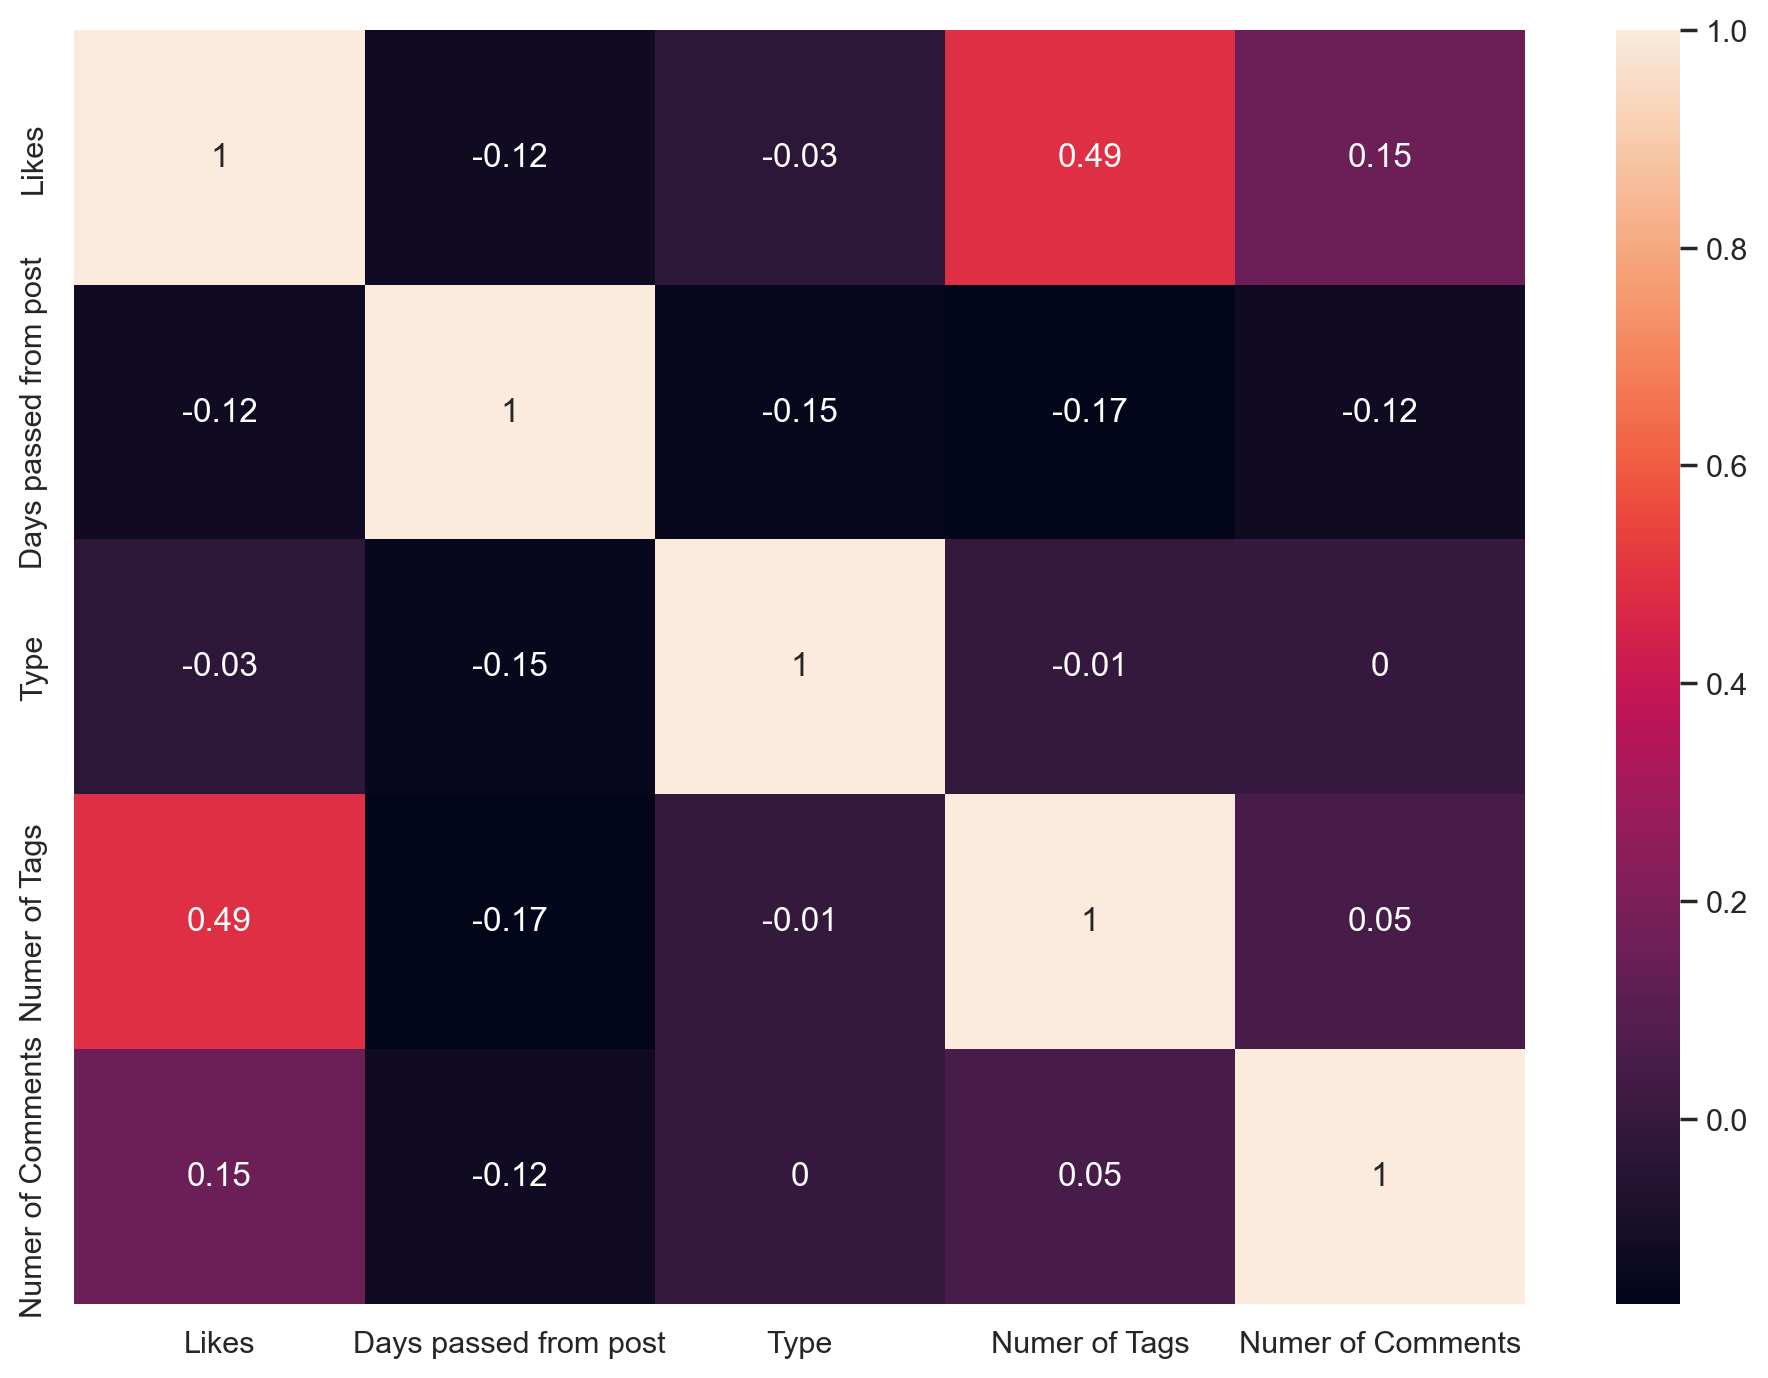

In [17]:
# write your code here:
corr = insta_df.corr().round(2)
#corr.style.background_gradient(cmap='coolwarm')
# or
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data=corr, annot=True)


In [18]:
insta_df.corr()

,Likes,Days passed from post,Type,Numer of Tags,Numer of Comments
Likes,1.000000,-0.117478,-0.025980,0.492686,0.145042
Days passed from post,-0.117478,1.000000,-0.146155,-0.170063,-0.115434
Type,-0.025980,-0.146155,1.000000,-0.013724,0.002244
Numer of Tags,0.492686,-0.170063,-0.013724,1.000000,0.053189
Numer of Comments,0.145042,-0.115434,0.002244,0.053189,1.000000


    12- From the above pairplot, what did you observe? ( 1 points)

##### Write your answer here:

-- 
Large positive score indicates a strong positive(that is,in the same direction).Collinearity is a linear association between two predictors. Multicollinearity is a situation where two or more predictors are highly linearly related. In general, an absolute correlation coefficient of >0.7 among two or more predictors indicates the presence of multicollinearity.
A heat map was used as it is easier to identify the values easier.This is done by  
--The highest values are for diagonals

    13- Use a scatter plot to check each feature's relationship with the target variable, Likes. (1 points)

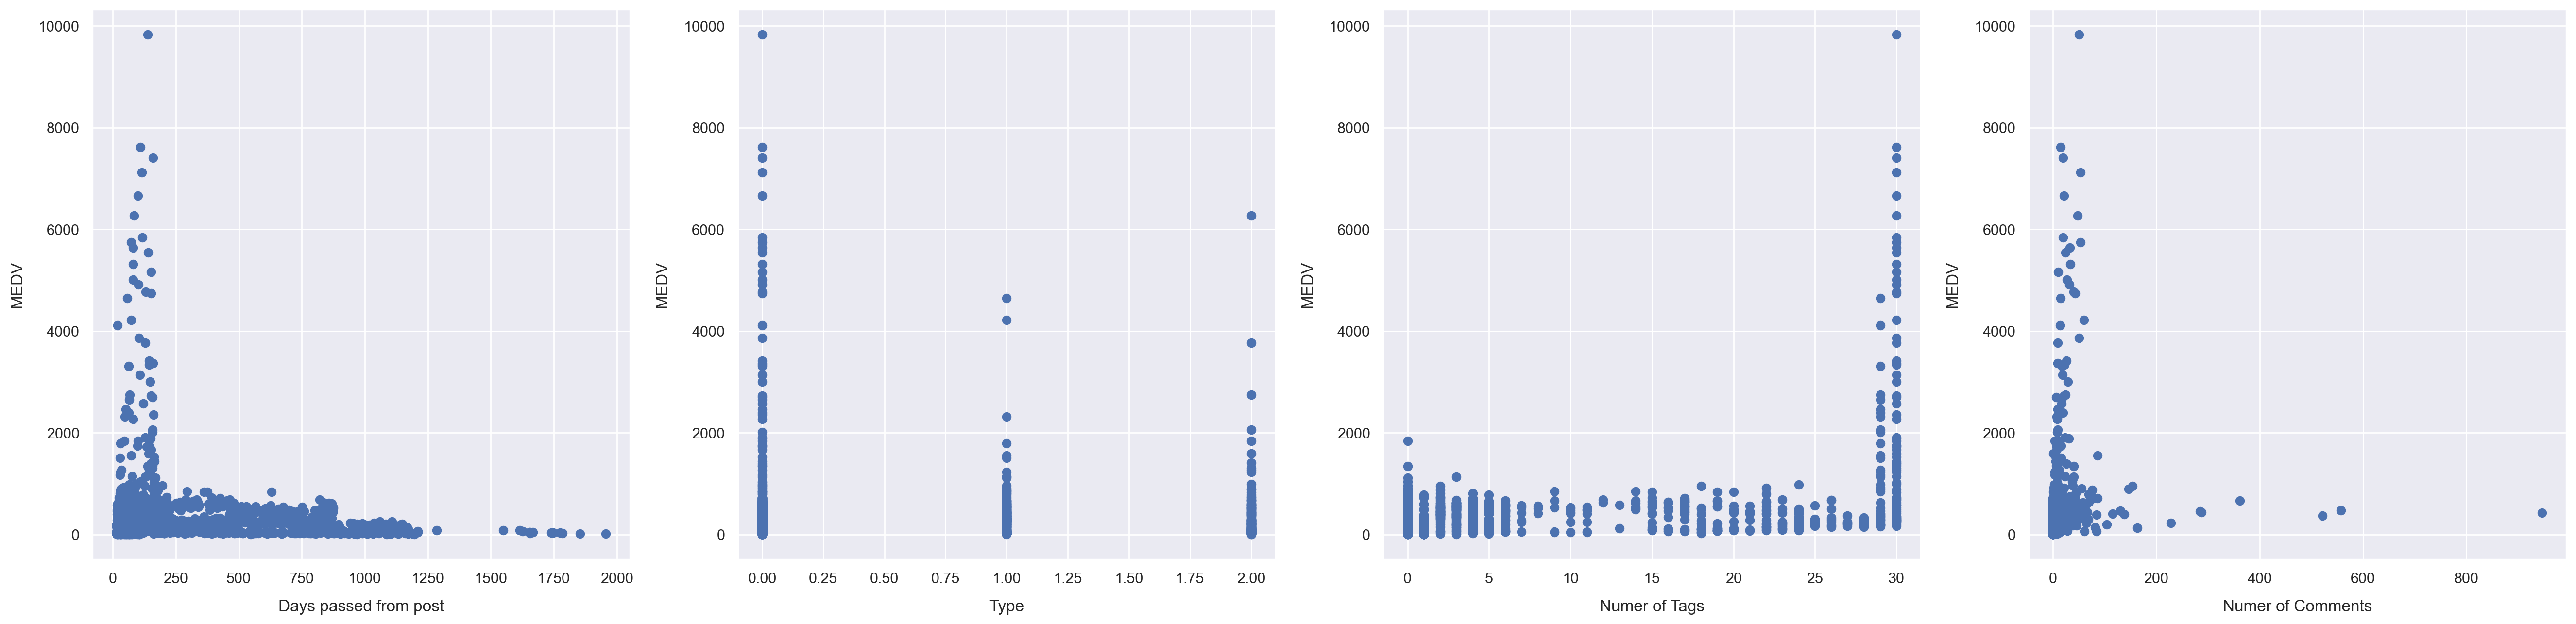

In [19]:
# write your code here
plt.figure(figsize = ( 50 , 25 )) 
for i, j in enumerate (X): 
    x=insta_df[j]
    y=y
    plt.subplot(3 , 6 ,i +1 ) 
    plt.scatter(x, y, marker = 'o' )
    plt.xlabel(j) 
    plt.ylabel( 'MEDV' )
    

    14- From the above pairplot, what did you observe? ( 1 points)


##### Write your answer here:

--Type and Number of Tags have discrete values.
Days passed from past and numberof comments are left skewed and seem continuous.
Outliers can be found in the plots.
Clusters found on the left bottom ofDays passed from past and numberof comments.
Non linear.

--It is clear that these features are not in the same scale 

    15- Display the target distribution using histogram (1 points)

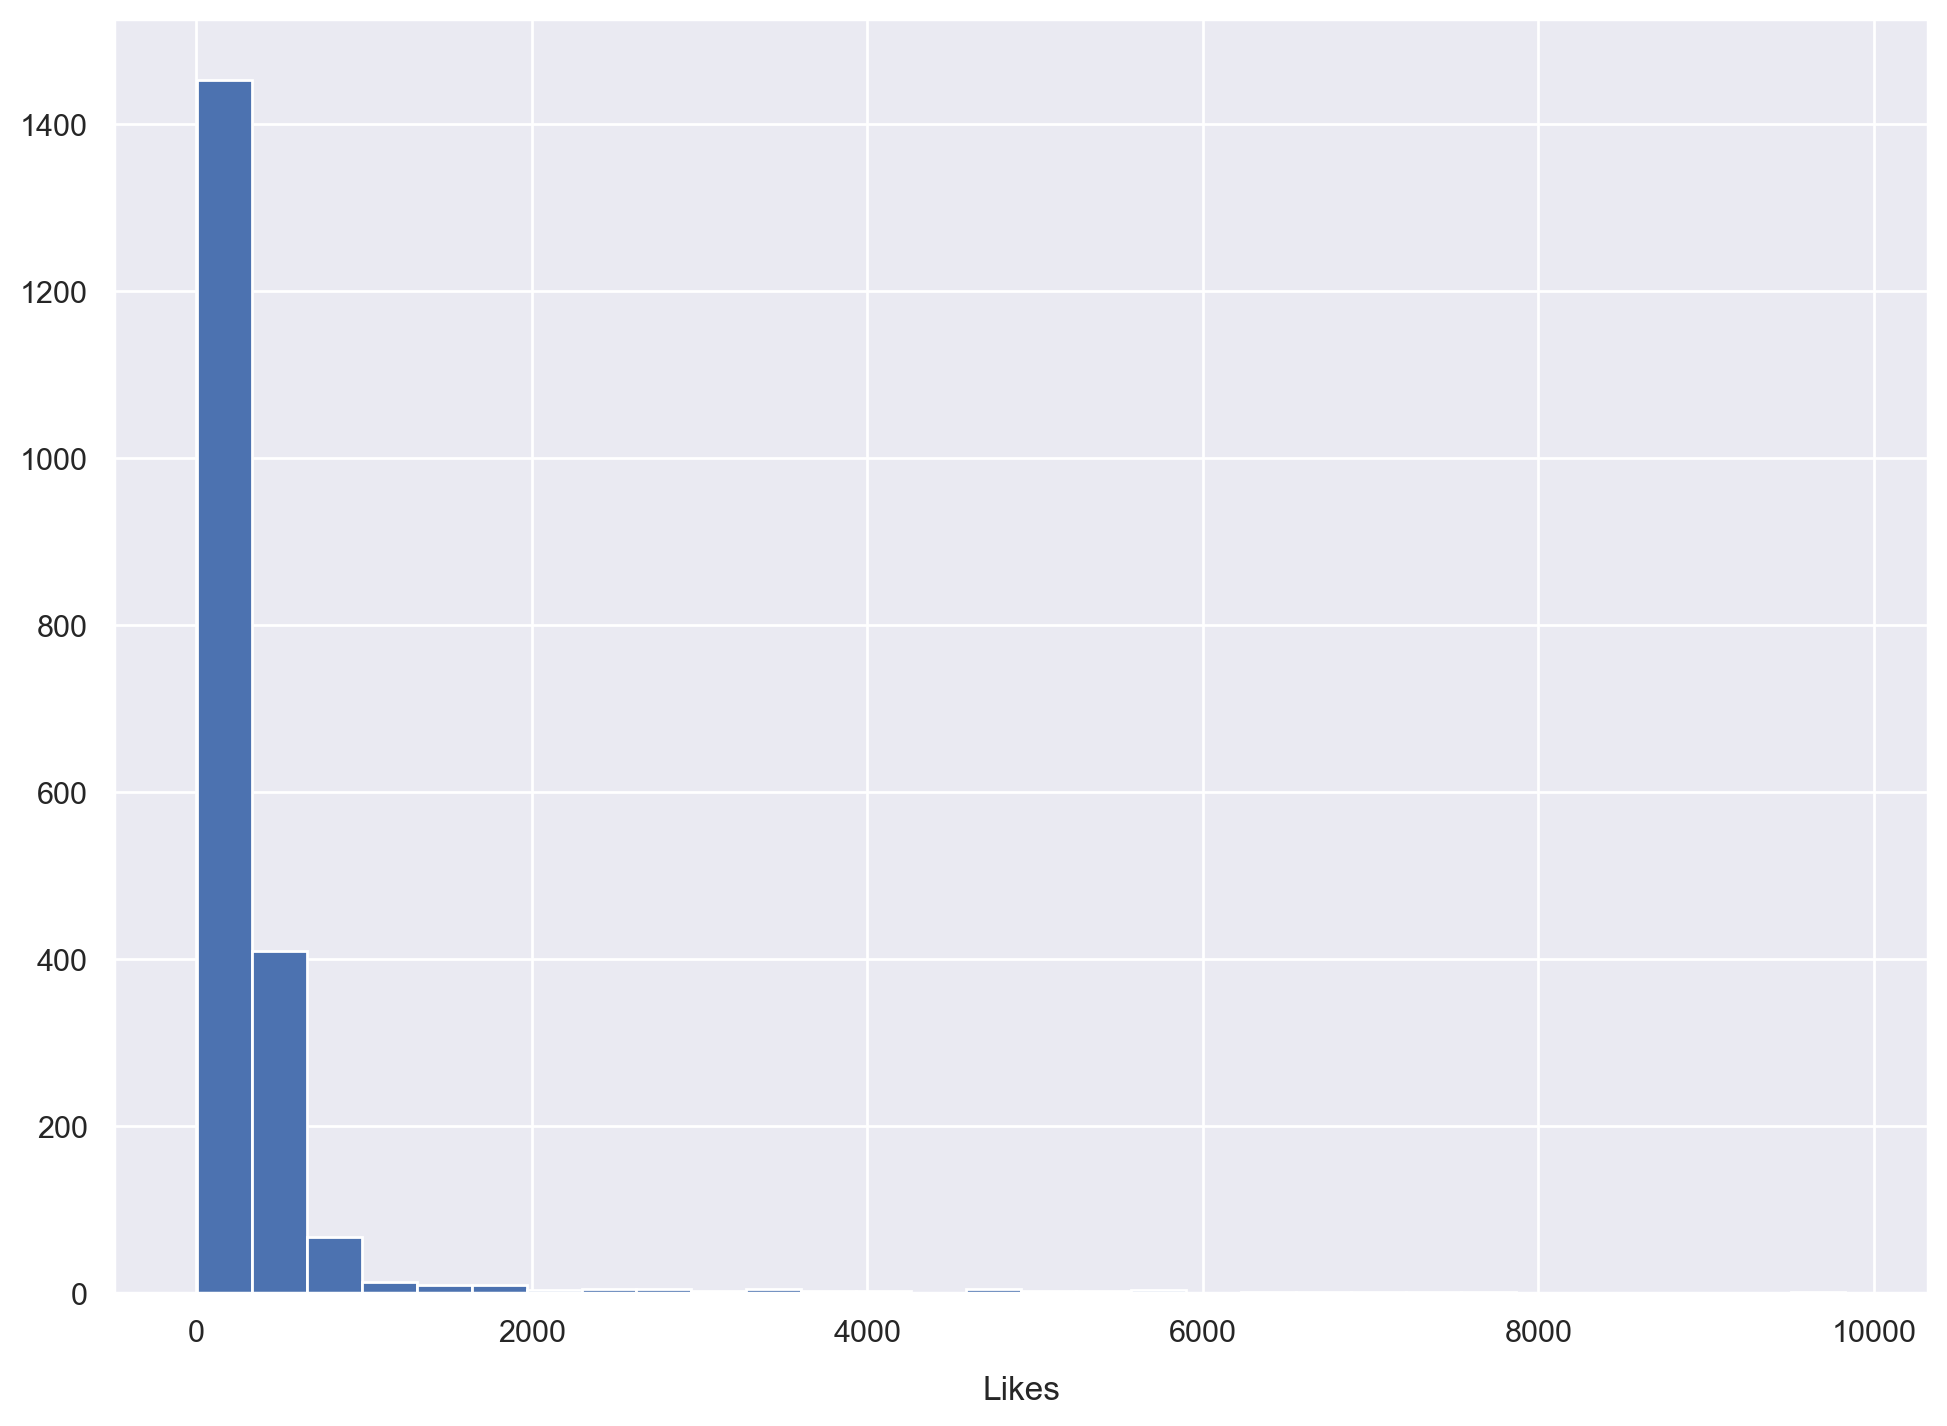

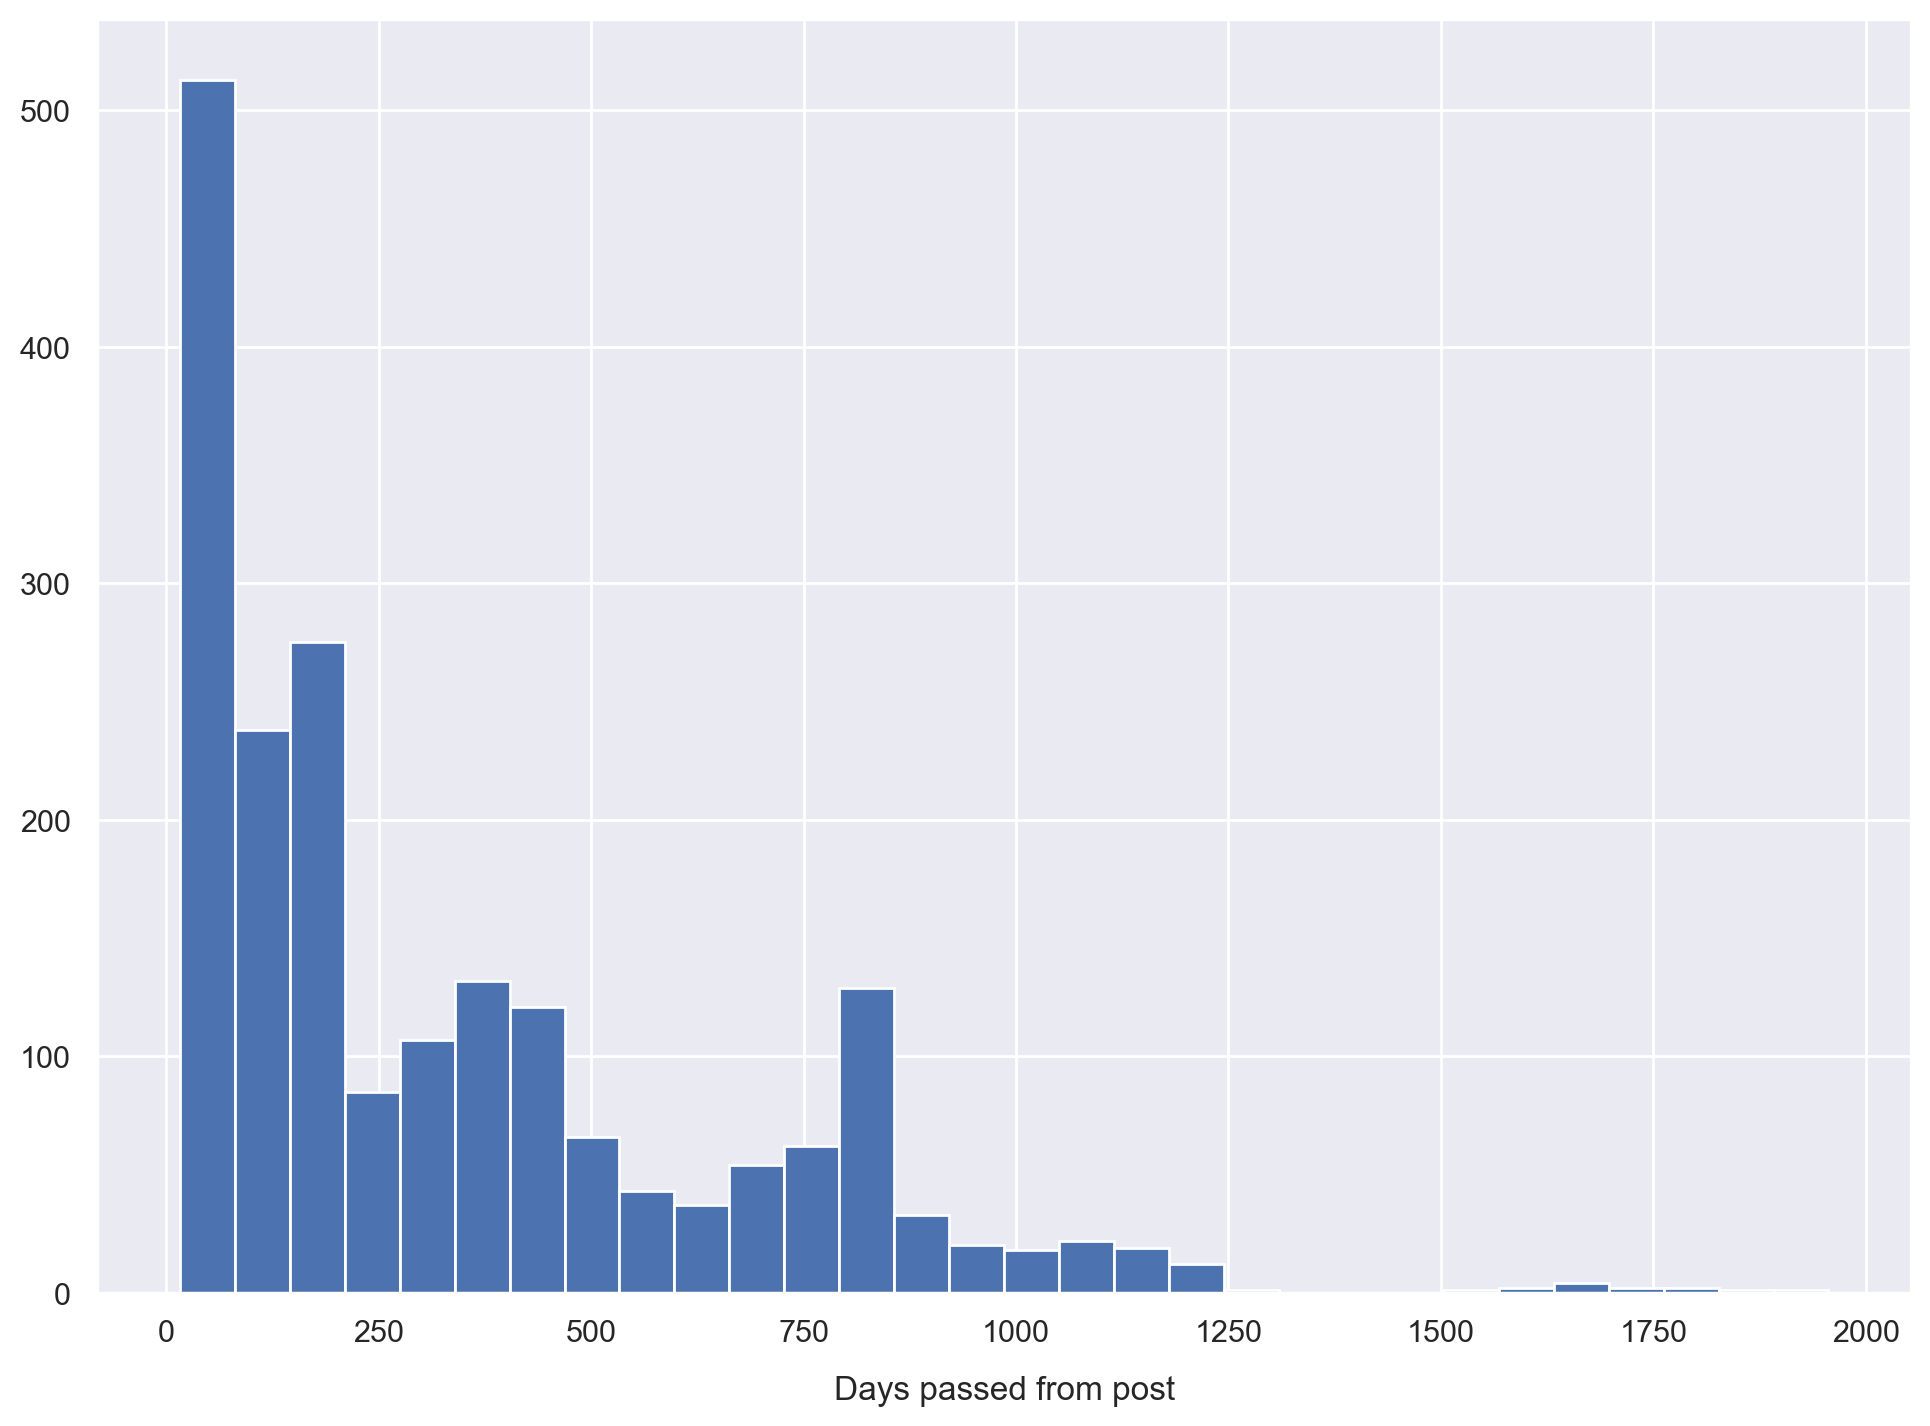

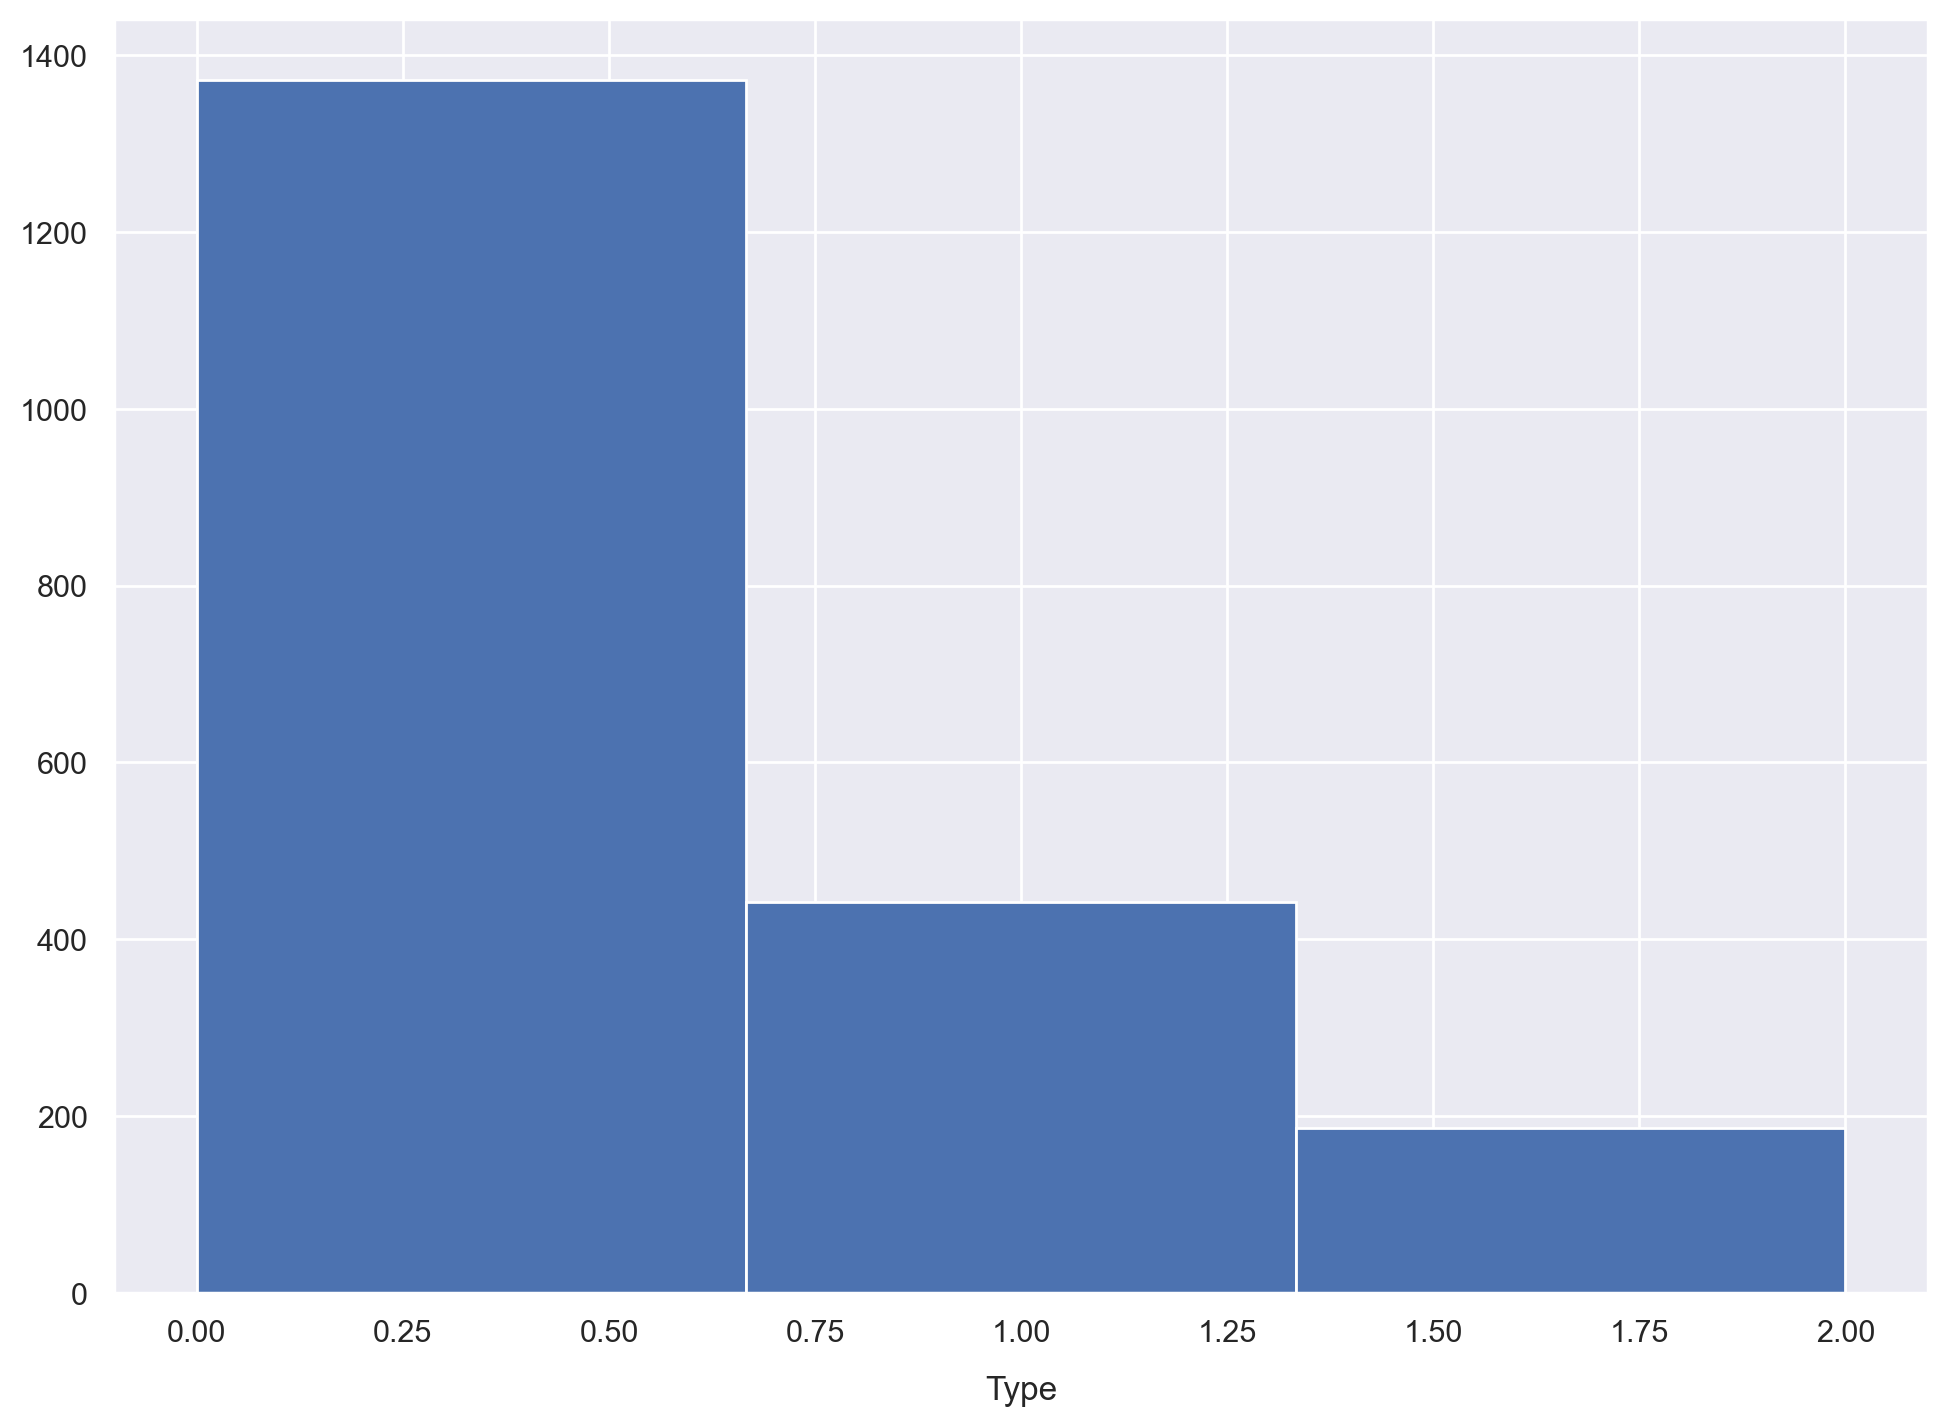

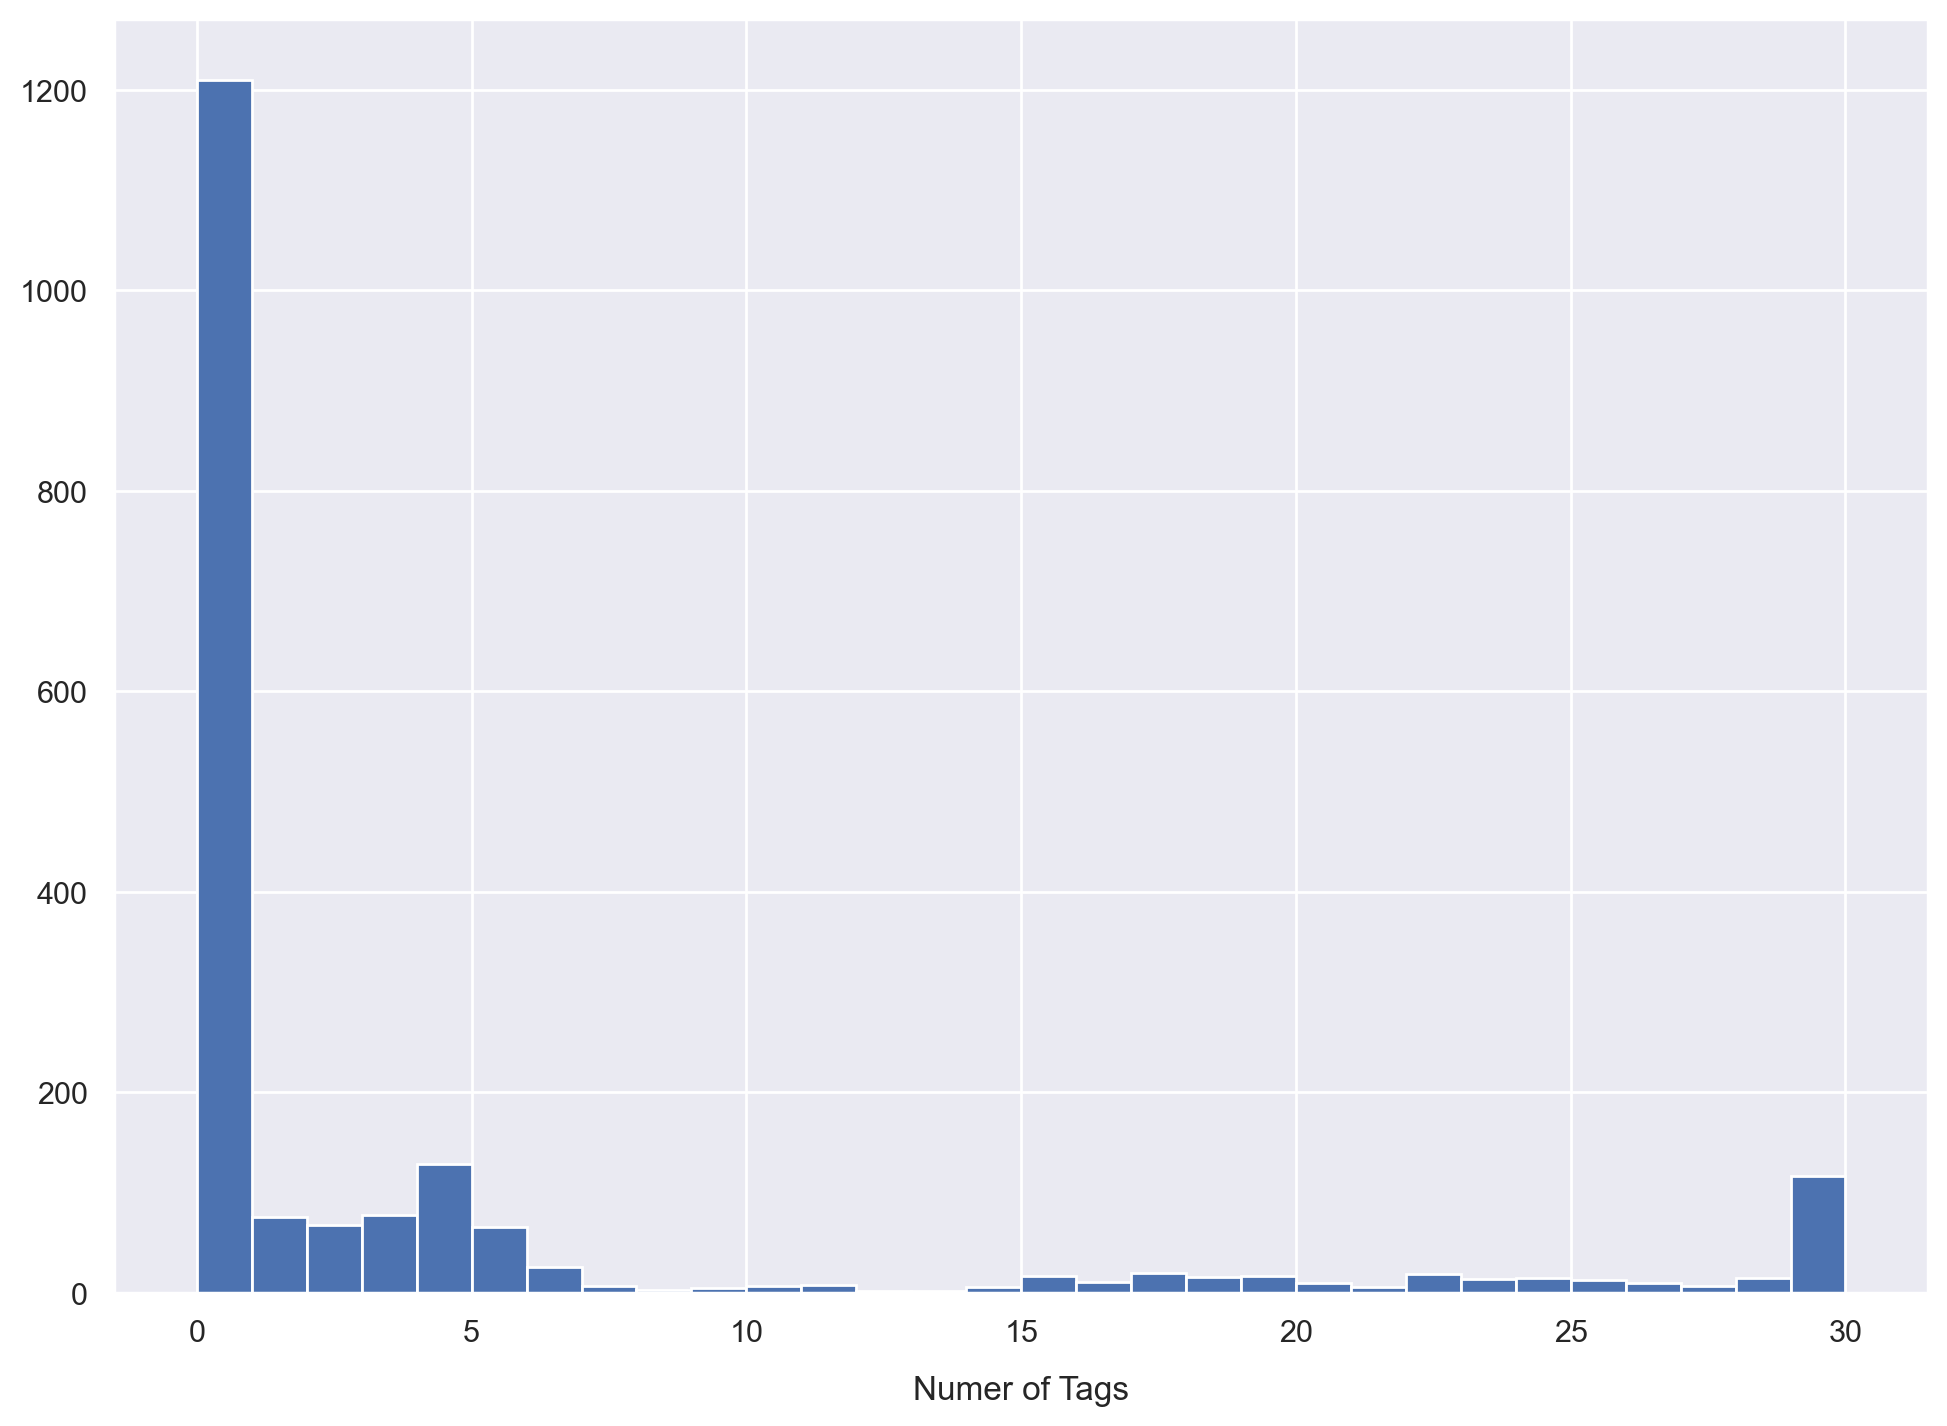

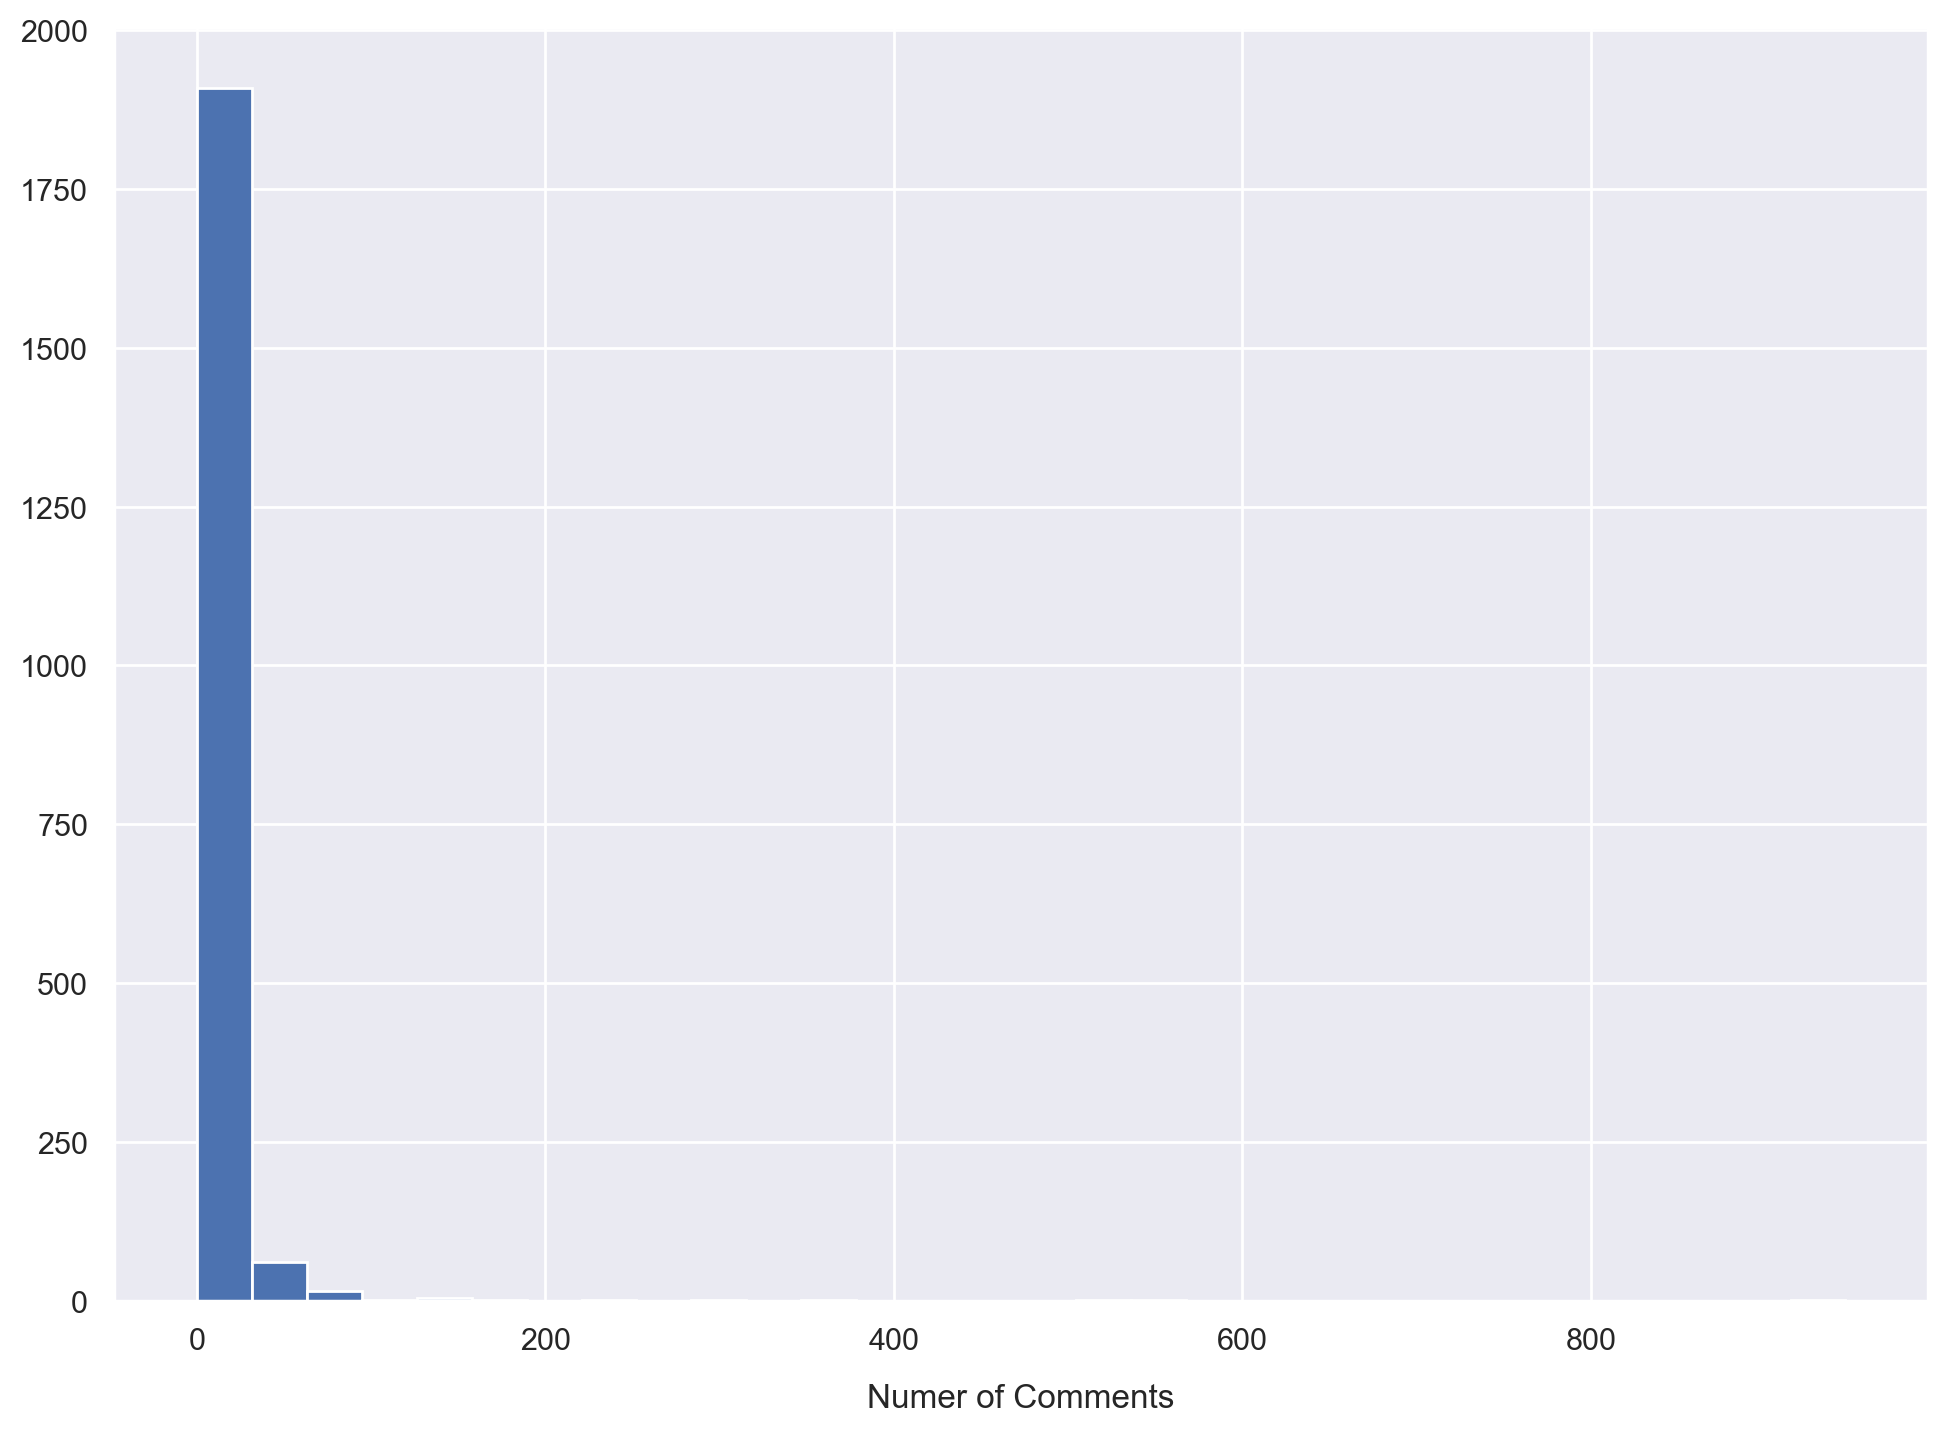

In [20]:
# write your code here:
for f in insta_df.columns:
    try:
        fig = plt.figure()
        num_bins = min((30, len(insta_df[f].unique())))
        insta_df[f].hist(bins=num_bins)
        plt.xlabel(f)
    except TypeError:
        print()
        print(insta_df[f].value_counts())
        print('-'*30)
        plt.close()

Text(0.5, 0, 'Target Likes')

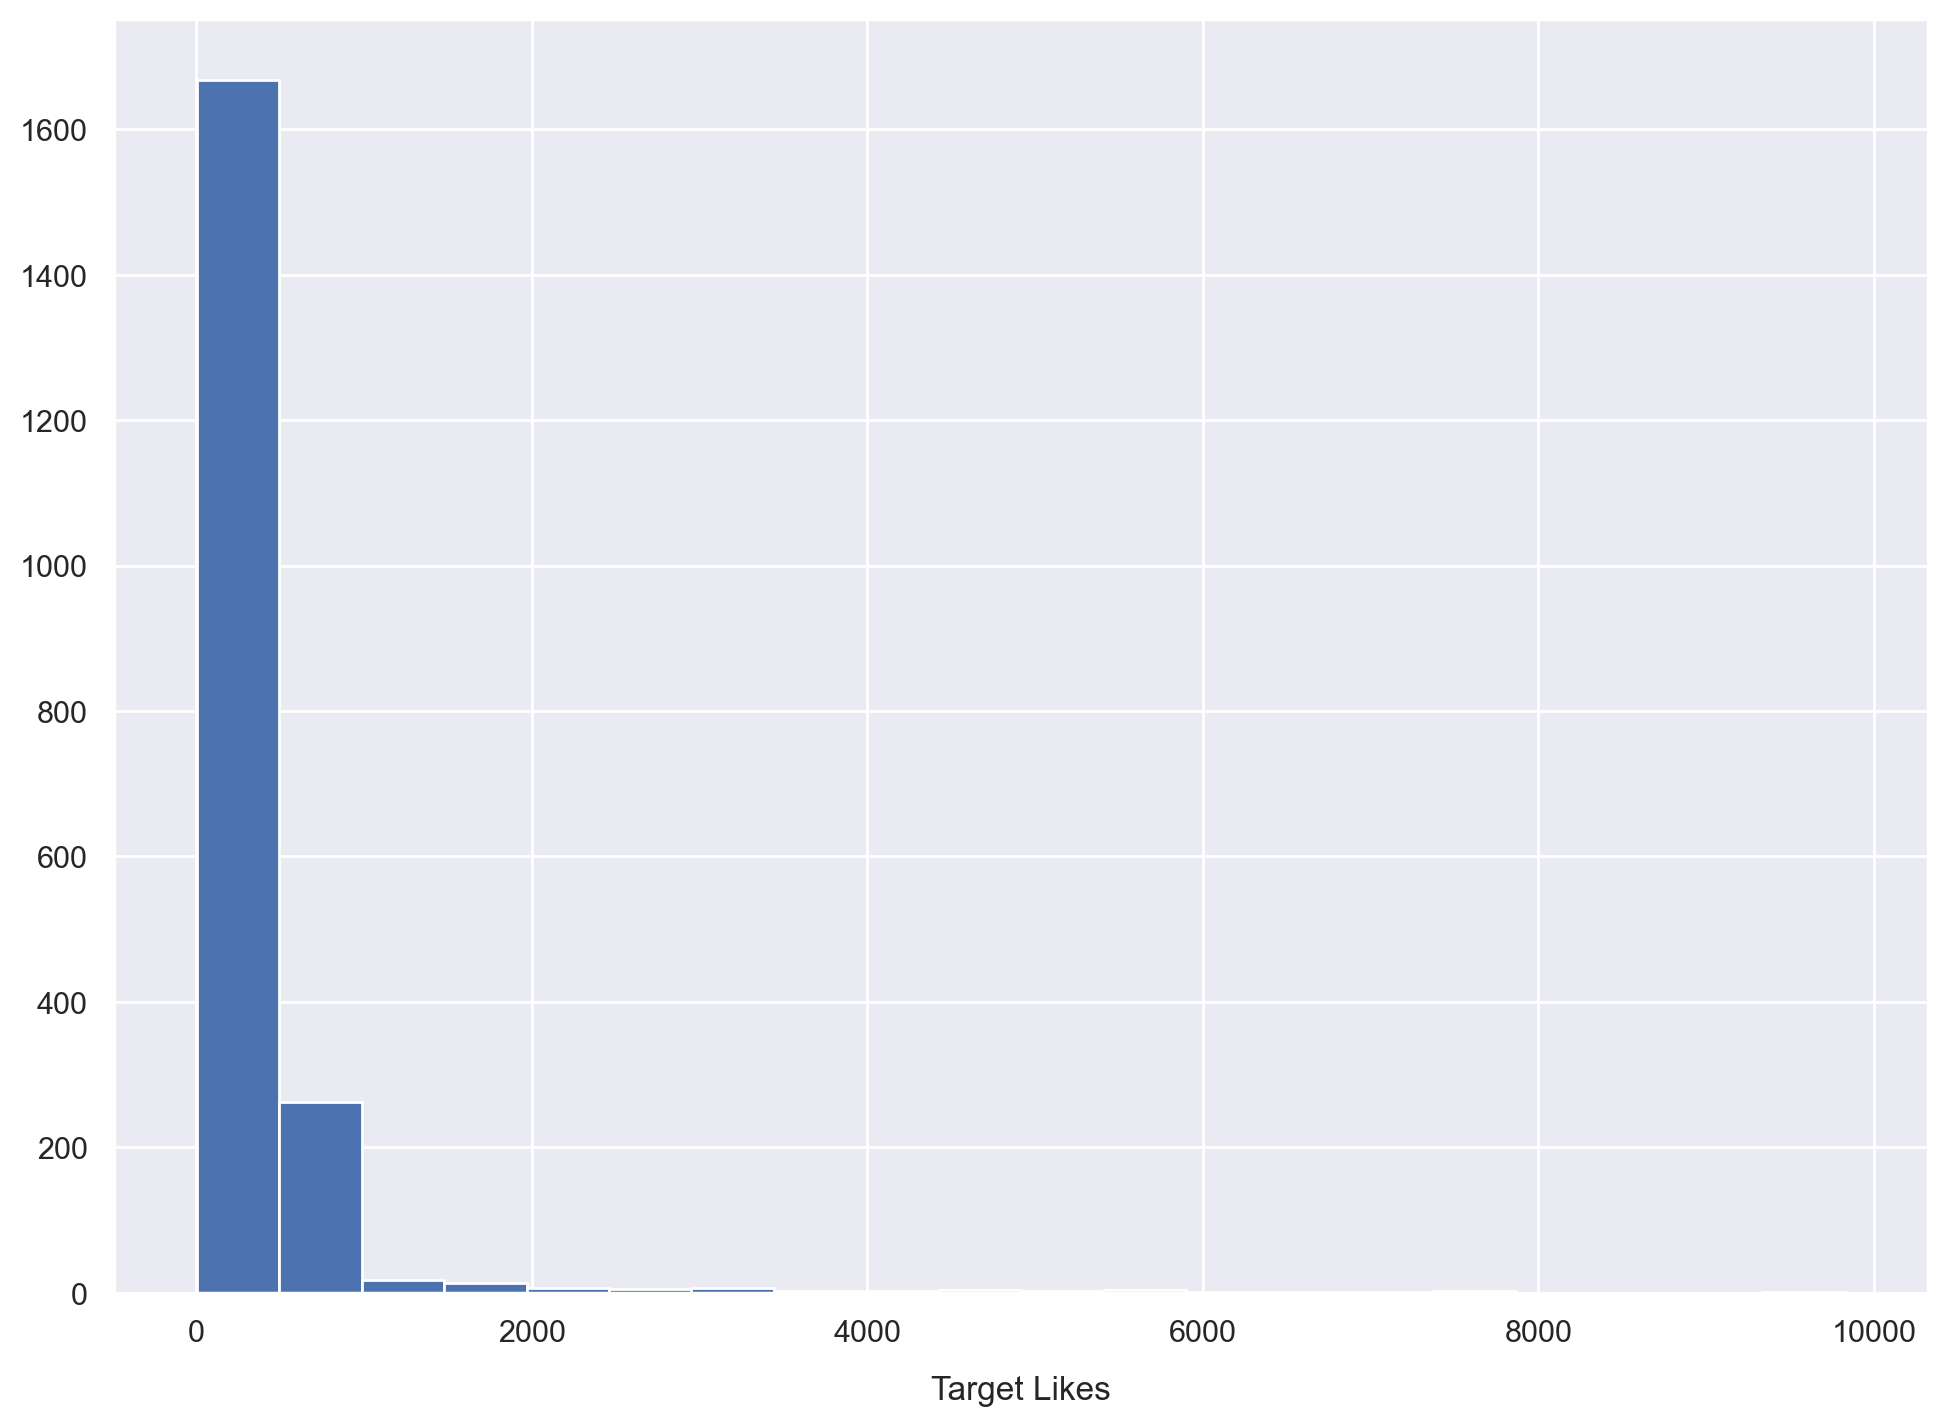

In [21]:
num_bins = min((20, len(y.unique())))
y.hist(bins=num_bins)
plt.xlabel('Target Likes')


    16- From the above histogram, what did you observe about the target distribution? ( 1 point)
    

##### Write your answer here:

--Target (Likes) has outliers.
Number of comments, number of Tags have outliers.


--

    17-Transfer the target y into log to have the normal distributions: (1 point)

In [22]:
#transfer the target y into log
y=np.log(y)
y

0       6.226537
1       5.953243
2       5.921578
3       5.743003
4       6.240276
          ...   
1995    4.060443
1996    4.394449
1997    5.525453
1998    6.869014
1999    5.187386
Name: Likes, Length: 2000, dtype: float64

### Preparing the machine learning pipeline


    18- Splitting the data into training 80% and testing sets 20%. (1 point)
        * print the sizes of our training and test set to verify if the splitting has occurred properly. (1 point)

In [23]:
# Splitting the data:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
# print the sizes of our training and test set:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 4)
(400, 4)
(1600,)
(400,)


    19- Use Pipeline class with the cross-validation to fit the scaling on only the training dataset and evaluate the linear regression model, (Use k=10 and MSE as your metric)( 2 point)

        * 'neg_mean_squared_error' returns the negated value of the MSE; make sure to take the absolute to get the positive one (1 point)
        * print the average MSE (1 point)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
lin_reg = LinearRegression()

In [73]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(StandardScaler(), LinearRegression())
scores_pipe_1 = cross_val_score(pipeline, X_train, y_train,cv=10)
print("Average 10-Fold CV R2 Score: {}".format((np.mean(scores_pipe_1)) ))
scores_pipe_2 = cross_val_score(pipeline, X_train, y_train,cv=10, scoring='neg_mean_squared_error') # this return the negated value of the MSE, make sure to multiply it by -1 to get the positive one
print("Average 10-Fold CV MSE Score: {}".format(-1*(np.mean(scores_pipe_2)) ))


Average 10-Fold CV R2 Score: 0.2684874006226226
Average 10-Fold CV MSE Score: 1.269653249692227


    20- Hyperparameters tuning using GridSearchCV (Use k=10 and MSE as your metric):

        A. Ridge regression:
            * Find out the best value of α’s (-3, -2, 1, 2, 3) for Ridge regression (1 point)
            * print the best score and the best alpha value (1 point)

In [74]:
# write your code here:
from sklearn.linear_model import Ridge
pipe_ridg = make_pipeline(StandardScaler(), Ridge())
pipe_ridg.fit(X_train,y_train)
y_predt = pipe_ridg.predict(X_test)
print("Ridge train score: %0.6f" % pipe_ridg.score(X_train, y_train))
print("Ridge test score: %0.4f" % pipe_ridg.score(X_test,y_test))

Ridge train score: 0.288833
Ridge test score: 0.2095


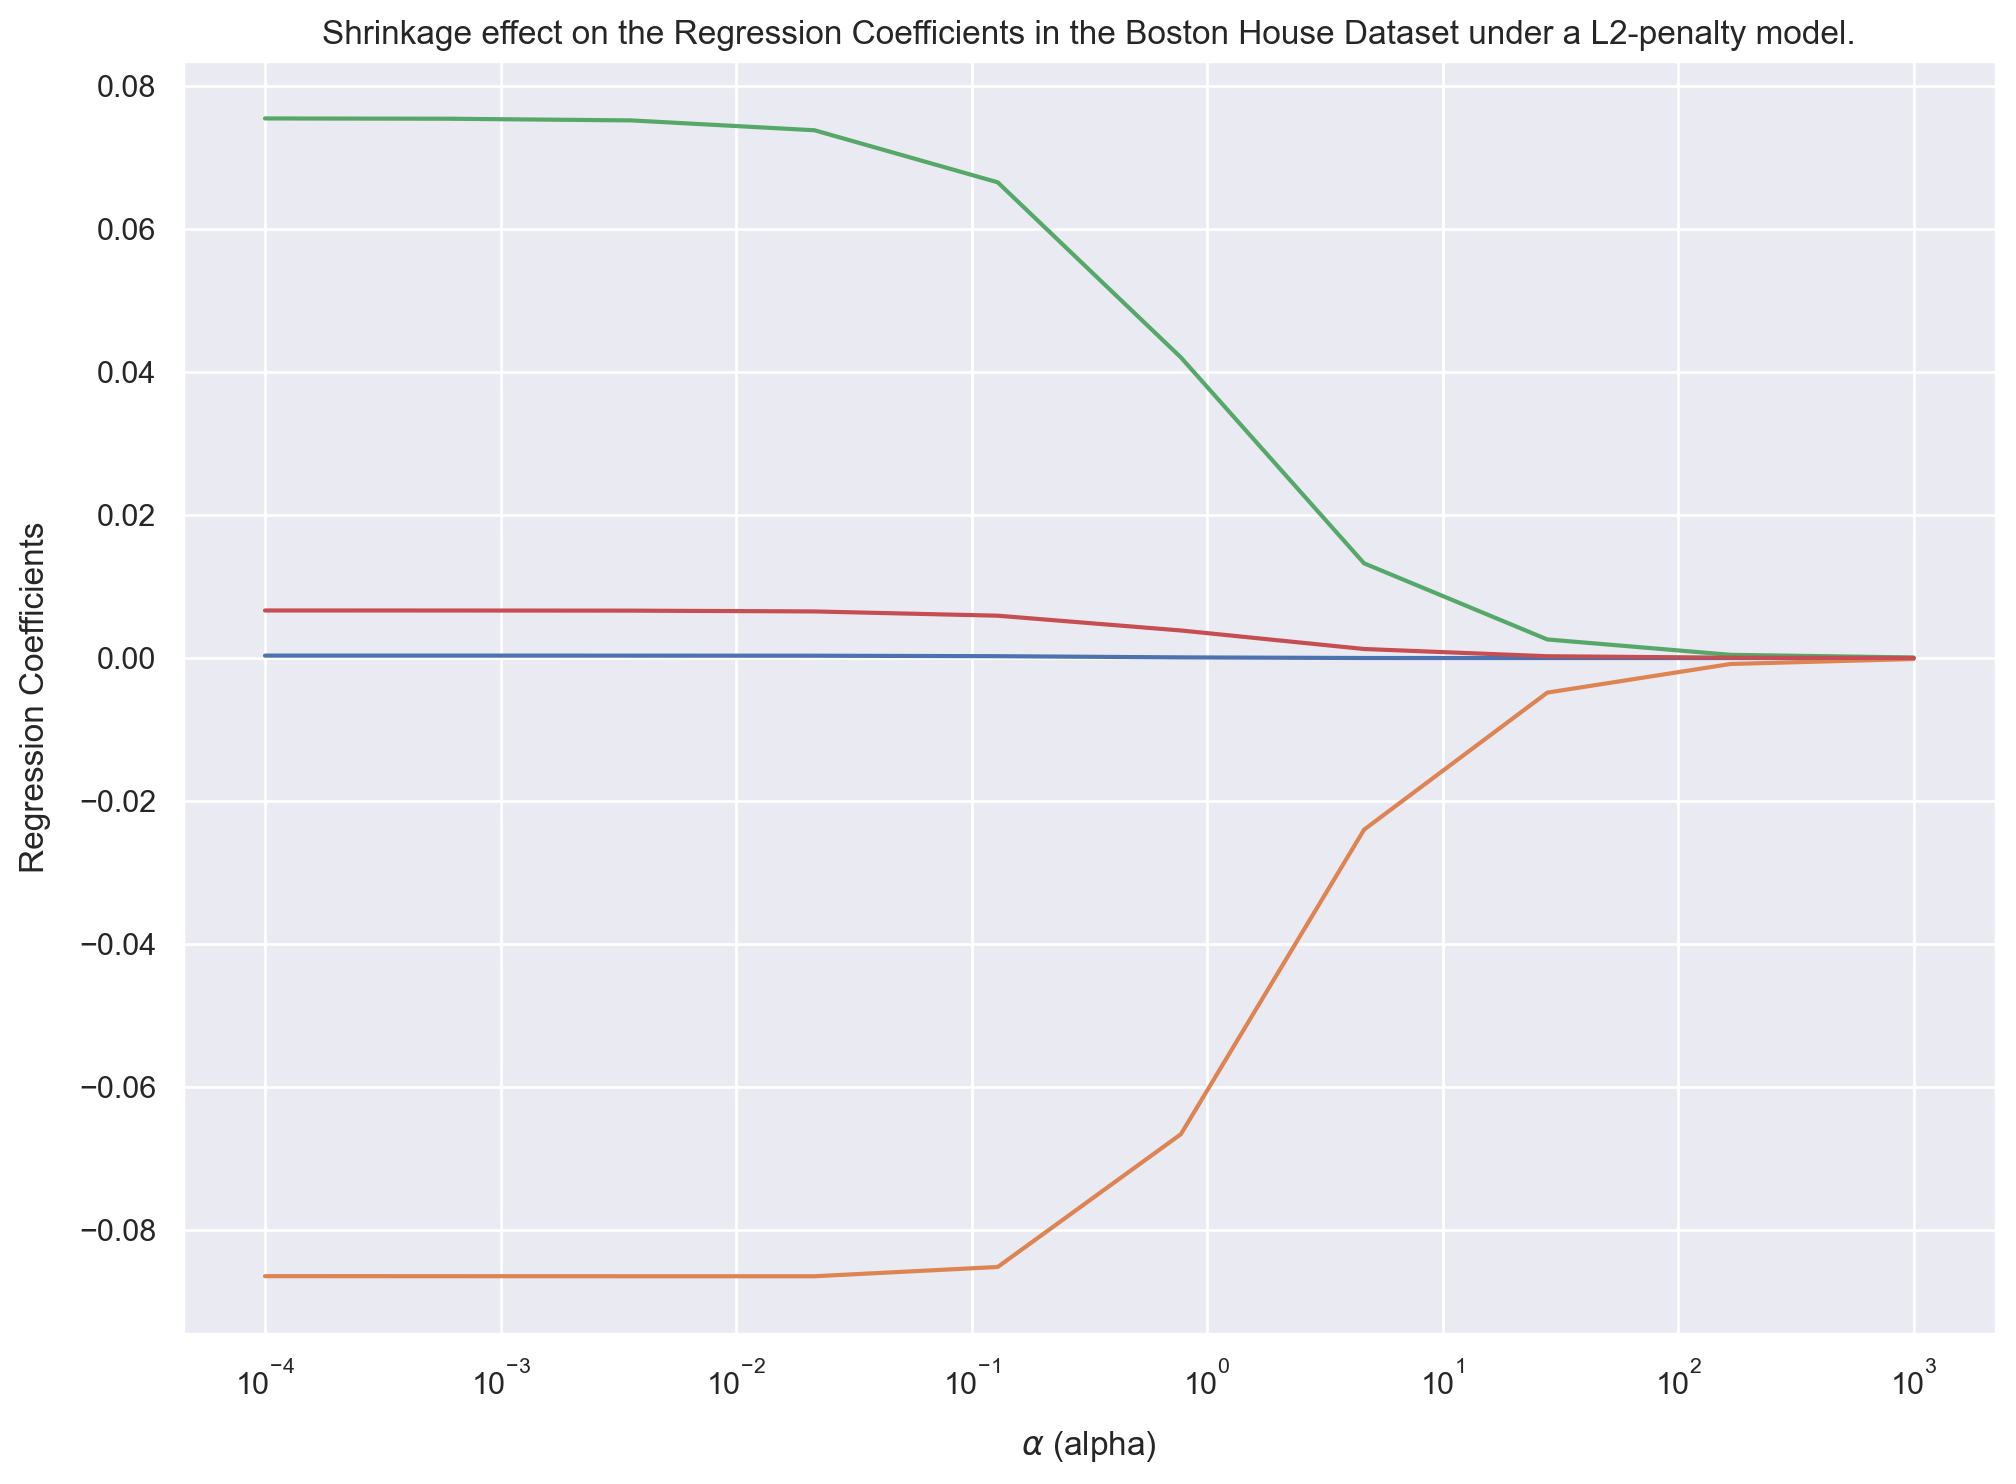

In [30]:
import warnings
with warnings.catch_warnings():
  # ignore all caught warnings
  warnings.filterwarnings("ignore")
  ridge = Ridge(normalize=True)
  alphas = np.logspace(-4,3,10)
  coef = []
  for a in alphas:
      ridge.set_params(alpha=a)
      ridge.fit(X_train,y_train)
      coef.append(ridge.coef_)
  ax = plt.gca()
  ax.plot(alphas, coef)
  ax.set_xscale('log')
  ax.set_xlim(ax.get_xlim())
  plt.xlabel('$\\alpha$ (alpha)')
  plt.ylabel('Regression Coefficients')
  plt.title("Shrinkage effect on the Regression Coefficients in the Boston House Dataset under a L2-penalty model.")
  plt.show()

In [ ]:
#Observations:

#The coefficients are shrunk towards zero as α gets bigger

In [37]:
from sklearn.model_selection import GridSearchCV

with warnings.catch_warnings():
  # ignore all caught warnings
  warnings.filterwarnings("ignore")
  param_grid = {'alpha': np.logspace(-2,3,10)}
  grid = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=10, return_train_score=True)
  grid.fit(X_train,y_train)
  best_score = float(format(grid.best_score_, '.4f'))
  print('Best CV score: {:.4f}'.format(-1*(grid.best_score_)))
  print('Best parameter :',grid.best_params_)

Best CV score: 1.2681
Best parameter : {'alpha': 0.03593813663804628}


        B. Lasso: 
            * Find out the best value of α’s (-3, -2, 1, 2, 3) for Lasso method. (1 point)
            * print the best score and the best alpha value (1 point)

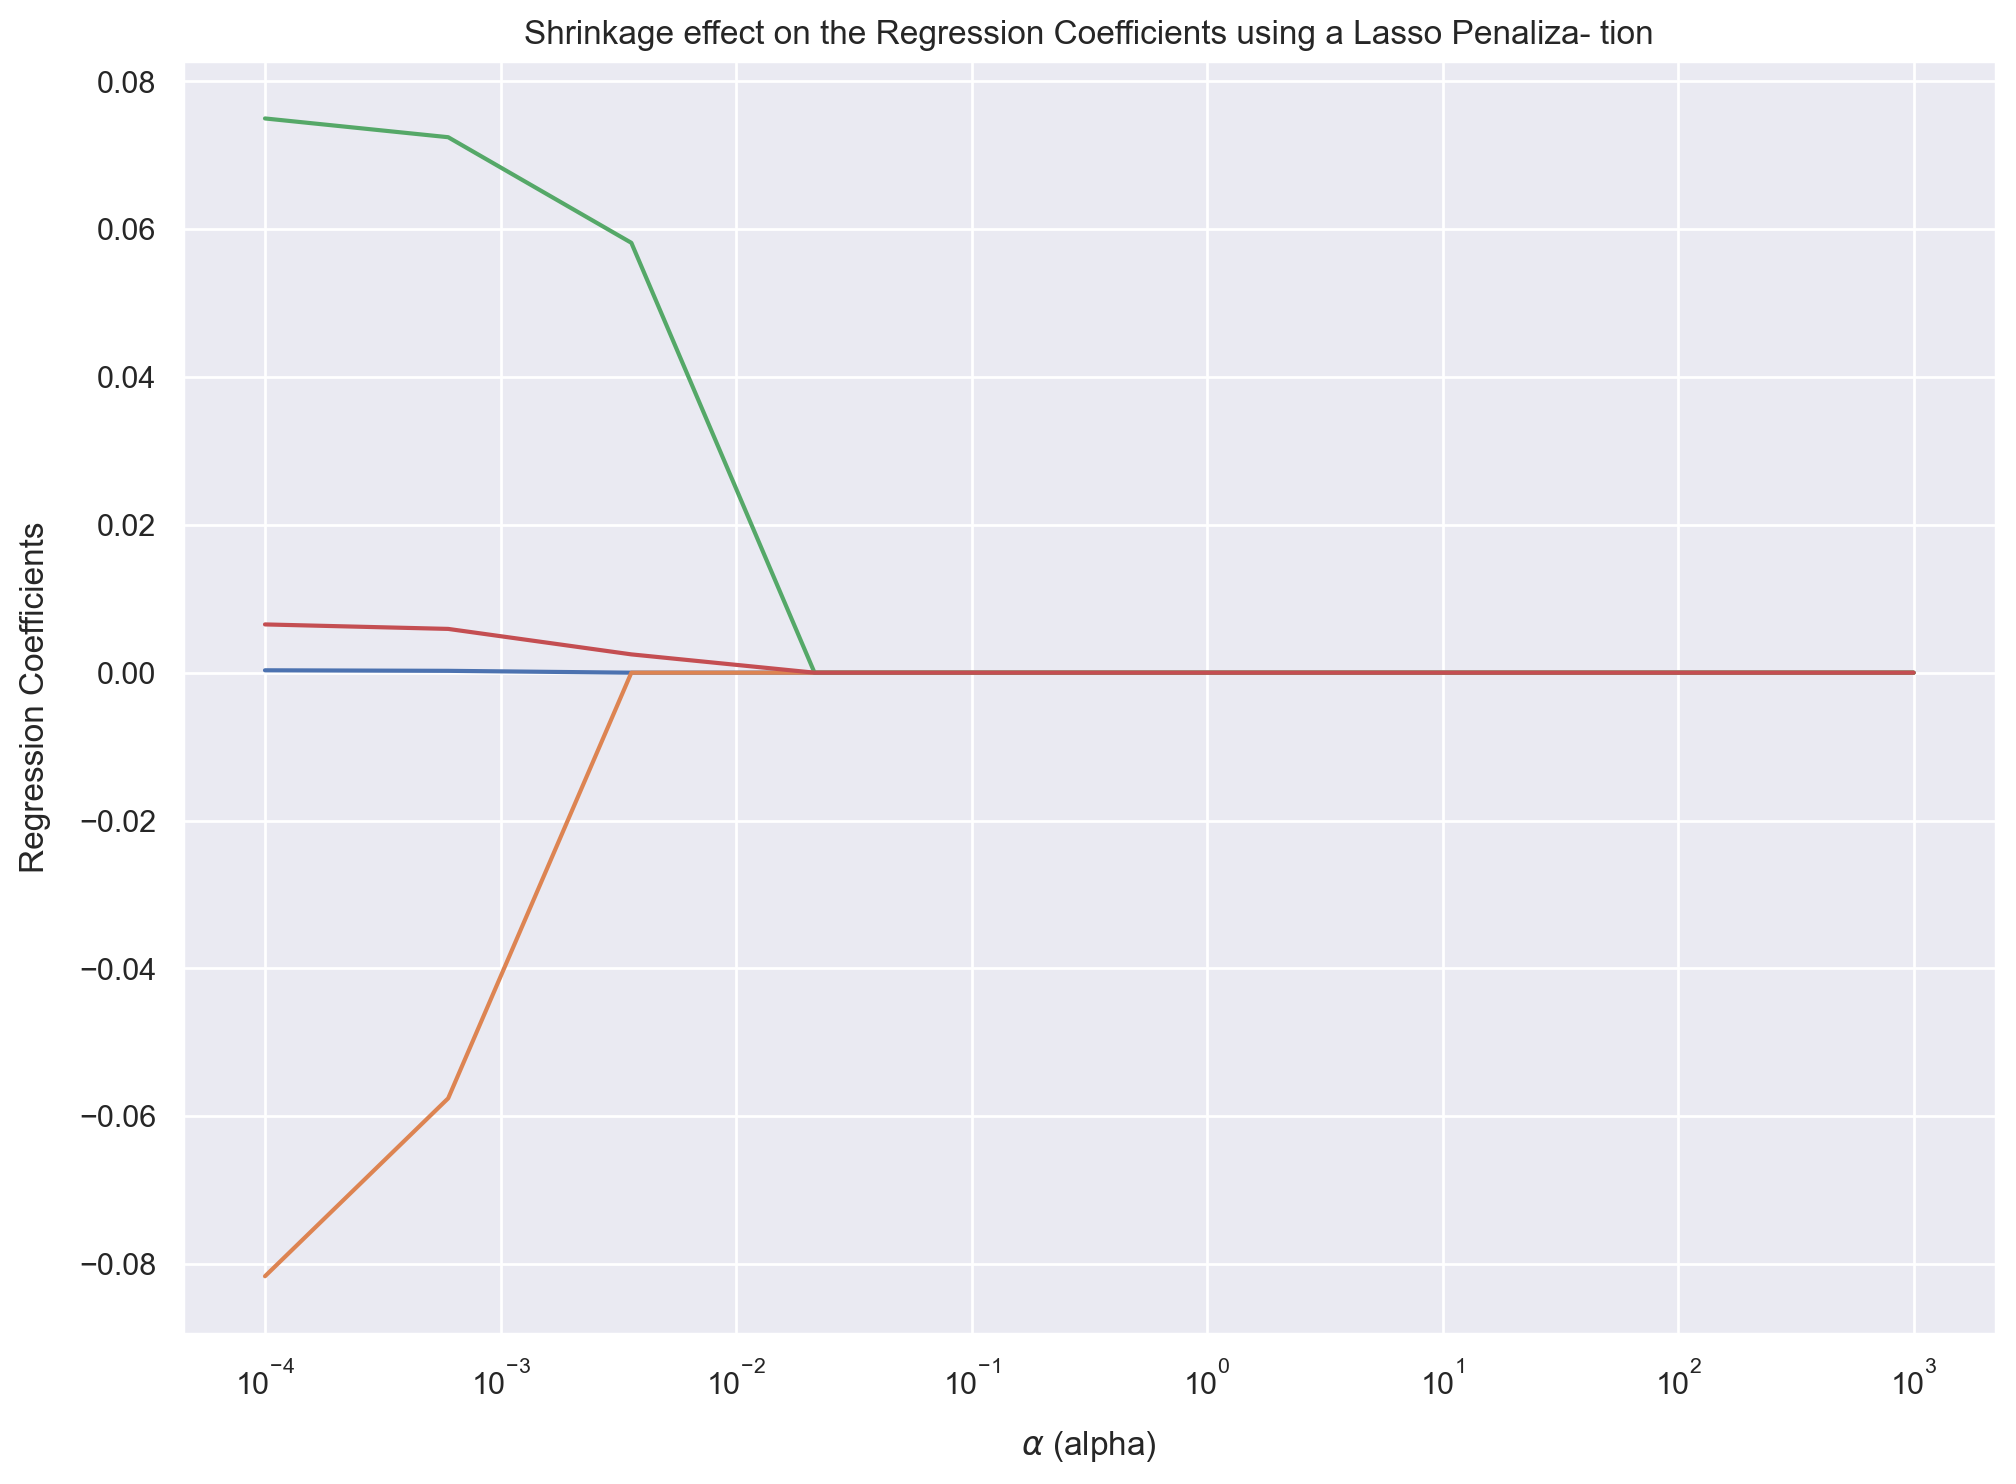

In [33]:
# write your code here:
from sklearn.linear_model import Lasso

with warnings.catch_warnings():
  # ignore all caught warnings
  warnings.filterwarnings("ignore")
  lasso = Lasso(max_iter=10000,normalize=True)
  coefs = list()
  for alpha in alphas:
      lasso.set_params(alpha=alpha)
      lasso.fit(X_train,y_train)
      coefs.append(lasso.coef_)
  ax = plt.gca()
  ax.plot(alphas, coefs)
  ax.set_xscale('log')
  ax.set_xlim(ax.get_xlim())
  plt.xlabel('$\\alpha$ (alpha)')
  plt.ylabel('Regression Coefficients')
  plt.title('Shrinkage effect on the Regression Coefficients using a Lasso Penaliza- tion')
  plt.show()


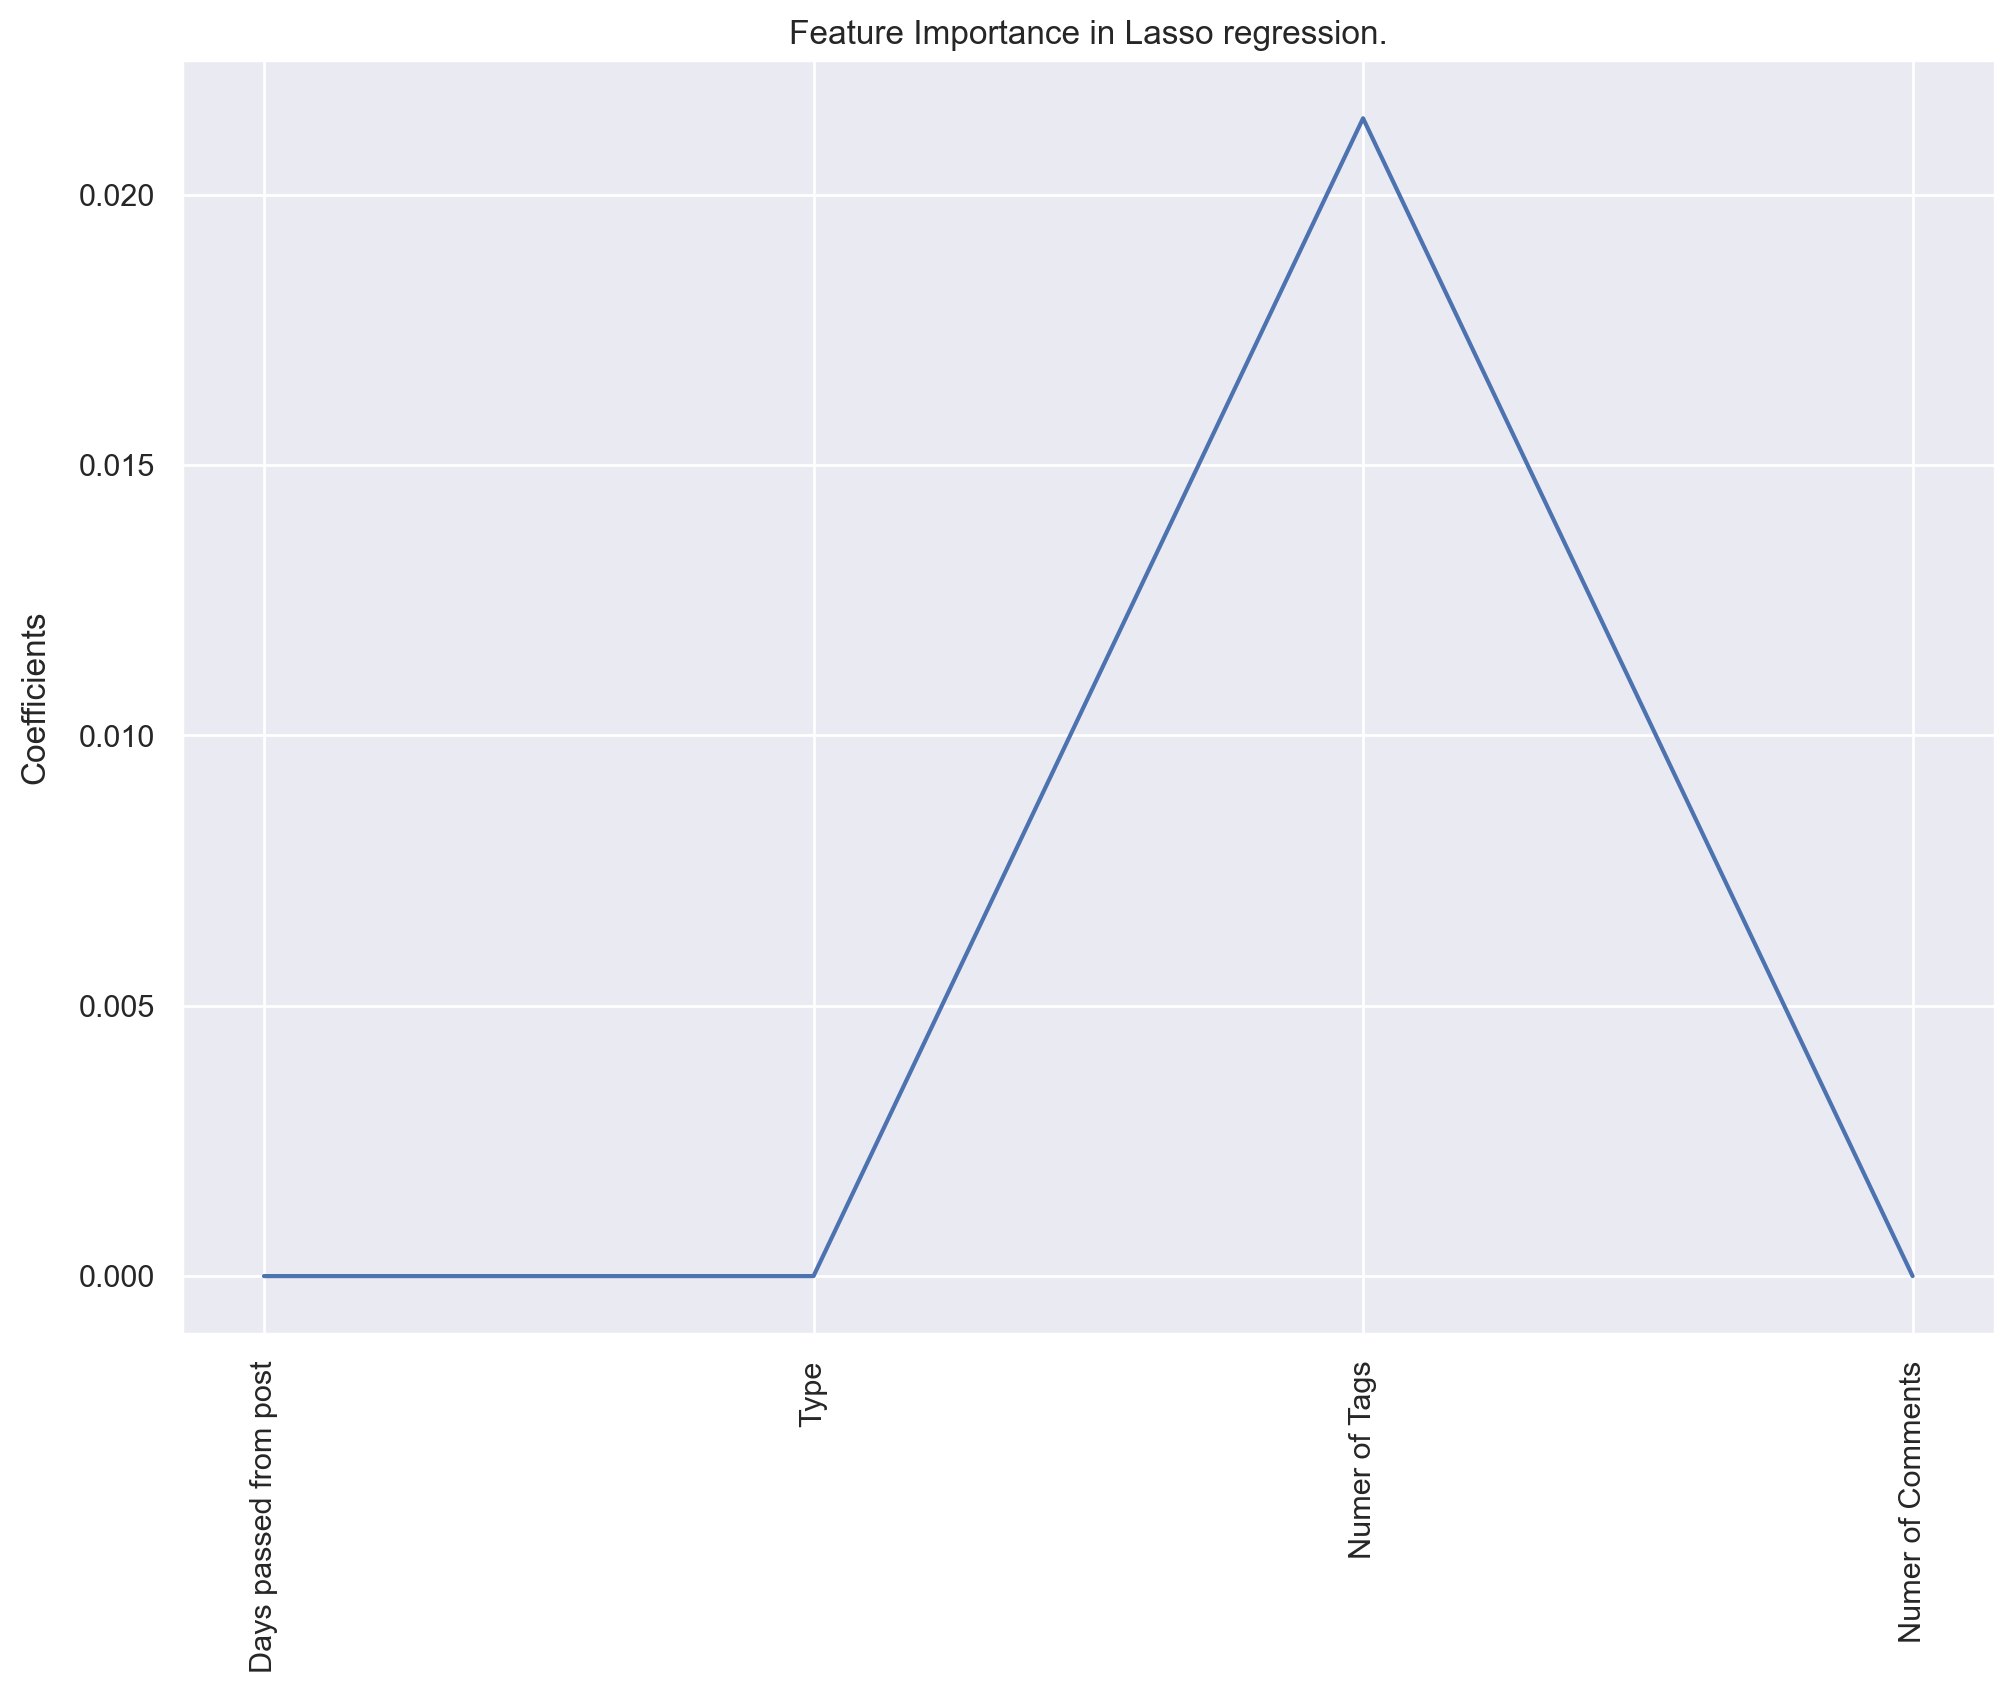

In [34]:
names = insta_df.drop('Likes', axis=1).columns
with warnings.catch_warnings():
  # ignore all caught warnings
  warnings.filterwarnings("ignore")
  lasso = Lasso(alpha=0.01, normalize=True)
  lasso_coef = lasso.fit(X, y).coef_
  plt.plot(range(len(names)), lasso_coef)
  plt.xticks(range(len(names)), names, rotation=90)
  plt.ylabel('Coefficients')
  plt.title('Feature Importance in Lasso regression.')
  plt.show()

In [76]:
from sklearn.model_selection import GridSearchCV

with warnings.catch_warnings():
  # ignore all caught warnings
  warnings.filterwarnings("ignore")
  param_grid = {'alpha': np.logspace(-2,3,10)}
  grid = GridSearchCV(lasso, param_grid, scoring='neg_mean_squared_error', cv=10, return_train_score=True)
  grid.fit(X_train,y_train)
  best_score = float(format(grid1.best_score_, '.4f'))
  print('Best CV score: {:.4f}'.format(-1*(grid.best_score_)))
  print('Best parameter :',grid.best_params_)

Best CV score: 1.4488
Best parameter : {'alpha': 0.01}


#### Robust regression

      21- Use Pipeline class with the cross-validation with k= 10 to fit the scaling on only the training dataset, and evaluate the models using 'neg_mean_squared_error':
    
            A.  The Huber regression model module ( 1 points)
                * print the absolute average MSE (1 point)

In [46]:
# write your code here:
from sklearn.linear_model import HuberRegressor
pipeline_huber = make_pipeline(StandardScaler(), HuberRegressor())
scores_huber = cross_val_score(pipeline_huber, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
print("Average 10-Fold CV MSE Score for Huber regression: {}".format(absolute((np.mean(scores_huber)) )))

Average 10-Fold CV MSE Score for Huber regression: 1.6378851316174736


        B.  The RANSAC regression model modle ( 1 point)
            * print the absolute avarge MSE (1 point)

In [47]:
# write your code here:
# evaluate model
from sklearn.linear_model import RANSACRegressor
pipeline_ransac = make_pipeline(StandardScaler(),RANSACRegressor())
scores_RANSAC = cross_val_score(pipeline_ransac,X_train, y_train, scoring='neg_mean_squared_error', cv=10)
#force scores to be positive
print("Average 10-Fold CV MSE Score for RANSAC regression: {}".format(absolute((np.mean(scores_RANSAC )) )))

Average 10-Fold CV MSE Score for RANSAC regression: 7.499115988048627


    22- From the above models you validated using cross-validation, which model performed very well on average? (1 point)         

##### Write your answer here:

--After using GridSearchCV to cross validate,Lasso Model has a CV-MSE score of 1.44 ,Ridge has 1.26. It is based on mean square error. Ridge has the minimum error

--After using Pipeline class to cross validate,Huber has 1.63 and Ransac has 7.49 MSE values.
We take as the best model as Ridge has the least error value amongst the other algorithms.

    23- Use the Best model to build/fit your final model using your train-data.(5 points)

In [53]:
# write your code here:
with warnings.catch_warnings():
  # ignore all caught warnings
  warnings.filterwarnings("ignore")
  param_grid = {'alpha': np.logspace(-2,3,10)}
  grid = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=10, return_train_score=True)
  grid.fit(X_train,y_train)
#best_score = float(format(grid.best_score_, '.4f'))
#print('Best CV score: {:.4f}'.format(-1*(grid.best_score_)))
#print('Best parameter :',grid.best_params_)'''

    24- Predict the number of likes for test data and compute the MSE (5 points)

In [78]:
# write your code here:
ypred=grid.predict(X_test)
print('Mean Predicted number of likes=', ypred.mean())


Mean Predicted number of likes= 4.903851684337655


In [77]:
def mse(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.square(np.subtract(actual,pred)).mean() 
print('MSE=',mse(y_test,ypred))

MSE= 1.2965506122388653


In [79]:
from sklearn.metrics import mean_squared_error
mSEE=mean_squared_error(y_test,ypred)
print('MSE=',mSEE)

MSE= 1.4281185603054554


In [81]:
print('All the predicted values:')
print(ypred)

All the predicted values:
[4.76072527 4.76072527 5.61741588 4.76072527 4.76072527 4.76072527
 4.76072527 4.76072527 4.87888949 5.61741588 4.87888949 4.76072527
 4.76072527 4.84934844 4.76072527 4.76072527 4.76072527 4.79026633
 4.81980738 4.76072527 4.76072527 4.76072527 4.76072527 4.76072527
 4.90843055 4.9379716  4.76072527 4.76072527 4.76072527 4.81980738
 4.76072527 4.76072527 4.79026633 4.76072527 4.76072527 4.76072527
 5.26292321 4.76072527 4.76072527 4.76072527 4.90843055 4.76072527
 4.76072527 4.81980738 5.4697106  4.76072527 4.76072527 4.76072527
 4.87888949 5.32200532 5.4697106  4.76072527 4.87888949 4.76072527
 4.76072527 4.76072527 5.4697106  4.76072527 5.29246427 4.76072527
 5.61741588 4.87888949 5.02659477 4.76072527 4.76072527 4.76072527
 4.76072527 5.58787482 4.87888949 5.61741588 4.90843055 4.76072527
 5.52879271 4.76072527 4.76072527 4.76072527 5.2038411  4.76072527
 4.76072527 4.76072527 4.87888949 4.76072527 5.61741588 5.61741588
 4.76072527 5.64695693 4.76072527 4.

    25- Write a conclusion about building a good model for predicting the number of likes using Instagram Users Datetime Posts. (10 points)

       your conclusion should include: 
        * why a specific model performs better than other models and why a regression algorithm works well with this dataset.
        * Did Robust regression algorithms outperformance the linear regression baseline or linear regression after applying Shrinkage Methods? Why?

    Write a summary of what you understand about linear regression and cross-validation. 

--In building a good model for predicting the number of likes using Instagram Users Datetime Posts, we found that the Ridge regression algorithm performed better than other models. This may be because Ridge is able to handle complex relationships between the features and the target variable, as well as handle outliers and missing values. Additionally, we found that a regression algorithm worked well with this dataset because we were predicting a continuous variable (number of likes) based on multiple features.

We also compared the performance of Robust regression algorithms to the linear regression baseline and linear regression after applying Shrinkage Methods. We found that the Robust regression algorithms outperformed both the linear regression baseline and linear regression after applying Shrinkage Methods. This is likely because the Robust regression algorithms are less affected by outliers and can better handle non-normal data distributions.

--In summary, linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship between the variables and is used to predict continuous values. Cross-validation is a technique used to evaluate the performance of a machine learning model by partitioning the data into training and testing sets. This helps to prevent overfitting and ensures that the model is generalizing well to new data.



---
## All set

Please make sure you execute each cell before you submit your file; this is important becuse if your code didn't work on our machine for an unknown reason, it would be better to see the result rather than losing some points or wasting time to contact you to fix this issue. 

What to submit:

* Your Jupyter Notebook file.
* Name your file as firstname_lastname_pj_1 . 
---